## Lab 1 - Data Science
### PCA Apriori
### Pablo Escobar 20936
### Eduardo 


In [43]:
# importamos las dependencias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.figure import Figure

### Realizar una exploración rapida de sus datos

In [13]:
# archivo a utilizar
fileName = 'risk_factors_cervical_cancer.csv'

# primero vamos a leer las columnas del archivo
data = pd.read_csv(fileName, sep=',', header=0)
print("Columnas del archivo:")
columns = list(data.columns)
for i in range(len(columns)):
    print(str(i) + " - " + columns[i])
    

Columnas del archivo:
0 - Age
1 - Number of sexual partners
2 - First sexual intercourse
3 - Num of pregnancies
4 - Smokes
5 - Smokes (years)
6 - Smokes (packs/year)
7 - Hormonal Contraceptives
8 - Hormonal Contraceptives (years)
9 - IUD
10 - IUD (years)
11 - STDs
12 - STDs (number)
13 - STDs:condylomatosis
14 - STDs:cervical condylomatosis
15 - STDs:vaginal condylomatosis
16 - STDs:vulvo-perineal condylomatosis
17 - STDs:syphilis
18 - STDs:pelvic inflammatory disease
19 - STDs:genital herpes
20 - STDs:molluscum contagiosum
21 - STDs:AIDS
22 - STDs:HIV
23 - STDs:Hepatitis B
24 - STDs:HPV
25 - STDs: Number of diagnosis
26 - STDs: Time since first diagnosis
27 - STDs: Time since last diagnosis
28 - Dx:Cancer
29 - Dx:CIN
30 - Dx:HPV
31 - Dx
32 - Hinselmann
33 - Schiller
34 - Citology
35 - Biopsy


In [14]:
# ahora vamos a leer los datos del archivo
print("\nDatos del archivo:")
print(data.head(5))


Datos del archivo:
   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagn

In [15]:
# ahora haremos un summary de los datos
print("\nSummary de los datos:")
print(data.describe())


Summary de los datos:
              Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min     

### 2. Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

In [17]:
# ahora vamos a ver los tipos de datos
columnsTypes = {}

tipos = {
    2 : "Binary",
    "object": "Category",
    "int64": "Discrete",
}

# vamos a indicar el tipo de dato de cada columna
for i in columns:
    uniqueValues= data[i].unique()
    amount = len(uniqueValues)
    
    if amount == 2:
        columnsTypes[i] = tipos[2]
    elif data[i].dtype == 'object':
        columnsTypes[i] = tipos["object"]
    elif data[i].dtype == 'int64':
        columnsTypes[i] = tipos["int64"]
    else:
        columnsTypes[i] = "Continuous"
        
# ahora vamos a ver los tipos de datos
for i in columns:
    print(str(i) + " - " + columnsTypes[i])
        

Age - Discrete
Number of sexual partners - Category
First sexual intercourse - Category
Num of pregnancies - Category
Smokes - Category
Smokes (years) - Category
Smokes (packs/year) - Category
Hormonal Contraceptives - Category
Hormonal Contraceptives (years) - Category
IUD - Category
IUD (years) - Category
STDs - Category
STDs (number) - Category
STDs:condylomatosis - Category
STDs:cervical condylomatosis - Binary
STDs:vaginal condylomatosis - Category
STDs:vulvo-perineal condylomatosis - Category
STDs:syphilis - Category
STDs:pelvic inflammatory disease - Category
STDs:genital herpes - Category
STDs:molluscum contagiosum - Category
STDs:AIDS - Binary
STDs:HIV - Category
STDs:Hepatitis B - Category
STDs:HPV - Category
STDs: Number of diagnosis - Discrete
STDs: Time since first diagnosis - Category
STDs: Time since last diagnosis - Category
Dx:Cancer - Binary
Dx:CIN - Binary
Dx:HPV - Binary
Dx - Binary
Hinselmann - Binary
Schiller - Binary
Citology - Binary
Biopsy - Binary


In [20]:
# contaremos cuantas veces aparece cada tipo 
typesOfColumns = {}

for i in columnsTypes:
    # si el tipo de dato ya existe, le sumamos 1
    typesOfColumns[columnsTypes[i]] = typesOfColumns.get(columnsTypes[i], 0) + 1
    
print("Cantidad de tipos de datos:")
for i in typesOfColumns:
    print(i + " - " + str(typesOfColumns[i]))
    

Cantidad de tipos de datos:
Discrete - 2
Category - 24
Binary - 10


### En el análisis del dataset, se encontraron los siguientes tipos de columnas: 2 discretas, 24 categóricas y 10 binarias. Es importante saber que hay más datos de tipo categórica porque esto implica que hay más variables que representan cualidades o grupos de los datos, y no valores numéricos. Esto puede afectar el tipo de análisis estadístico que se puede realizar, así como las técnicas de visualización y modelado que se pueden aplicar. Por lo tanto, es necesario identificar correctamente el tipo de cada columna y tratar los datos categóricos de forma adecuada.

### 3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.

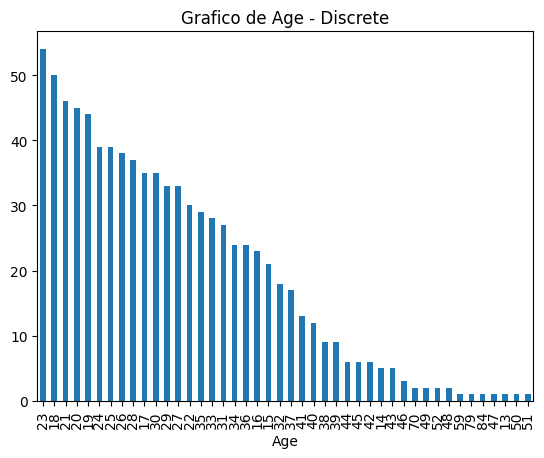

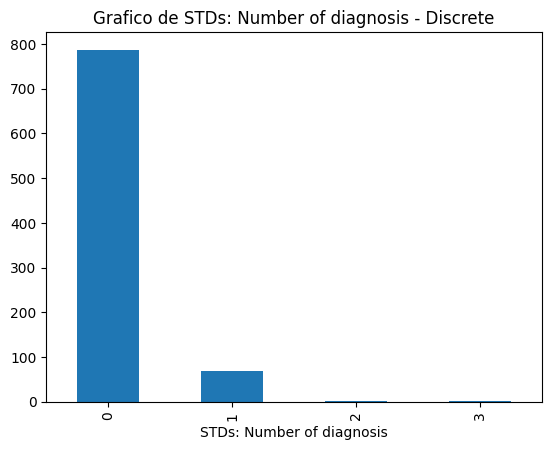

In [23]:
# cambiaremos los NAN por 0
dataWithoutNan = data.replace("?", float("NaN"), inplace=True)

# graficaremos las columnas de las variables de tipo Discrete

for i in columns:
    if columnsTypes[i] == "Discrete":
        data[i].value_counts().plot(kind='bar')
        plt.title(f"Grafico de {i} - {columnsTypes[i]}")
        plt.show()
        

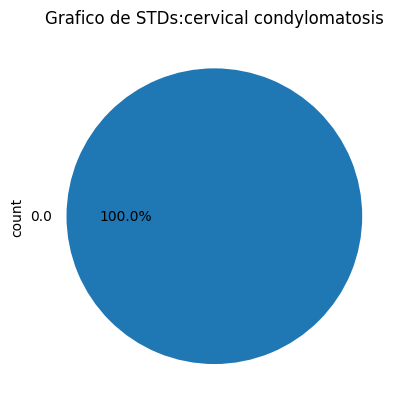

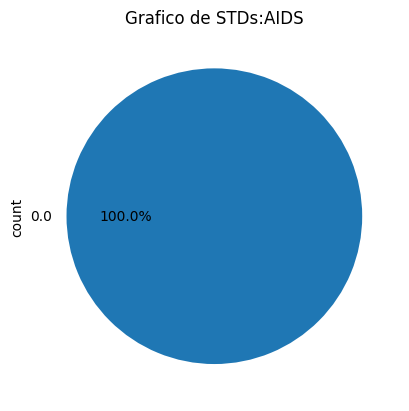

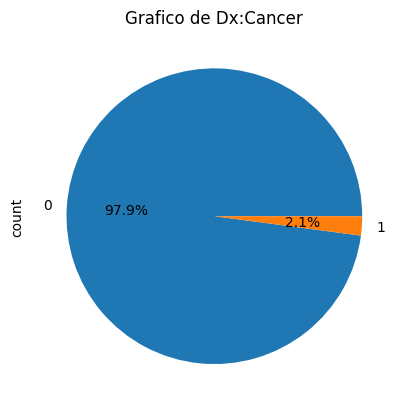

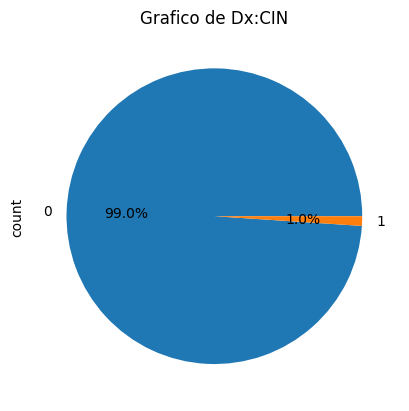

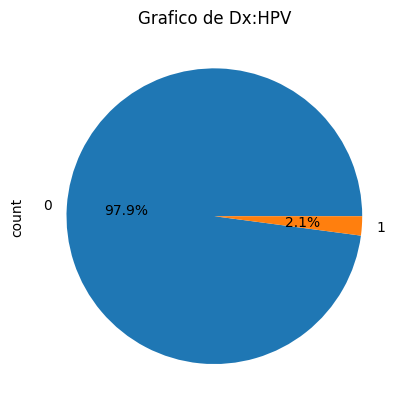

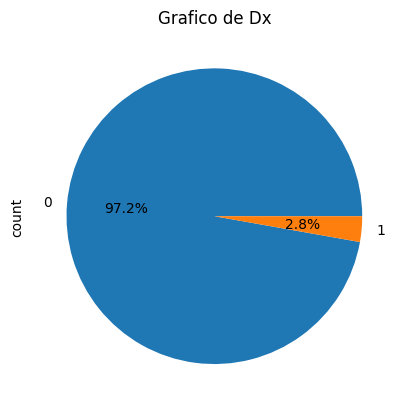

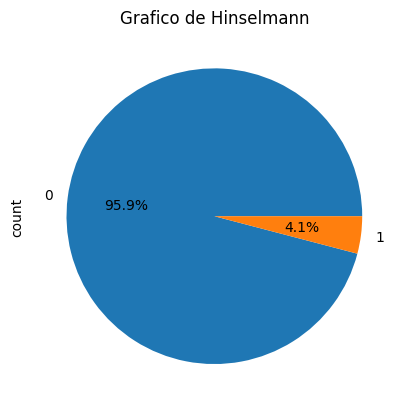

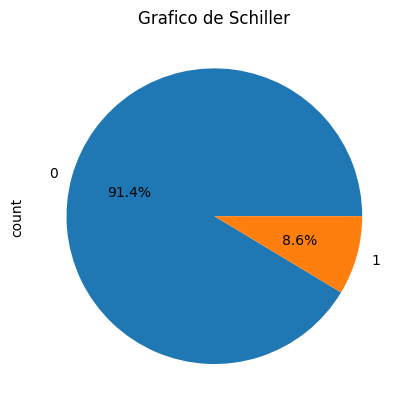

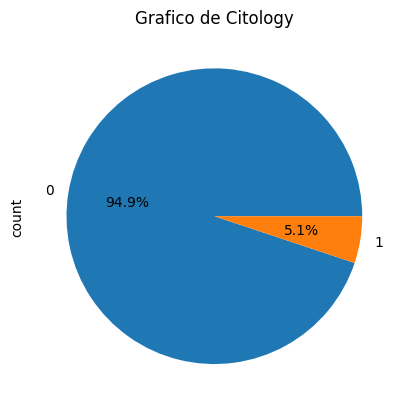

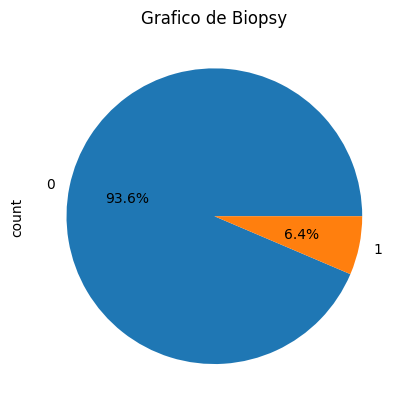

In [25]:
# graficaremos las columnas de las variables de tipo Binary
for i in columns:
    if columnsTypes[i] == "Binary":
        # vamos a cambiar los valores de 0 y 1 por sus respectivos valores
        data[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f"Grafico de {i}")
        plt.show()

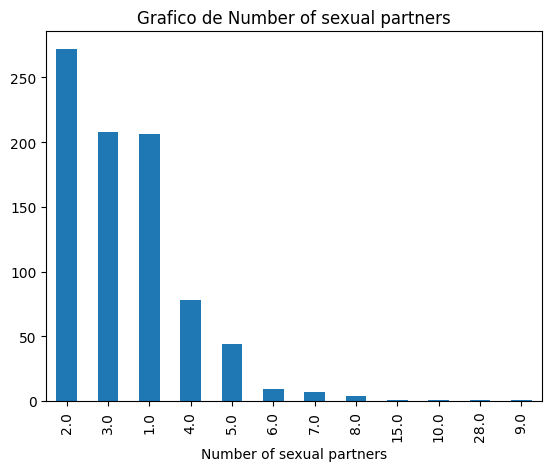

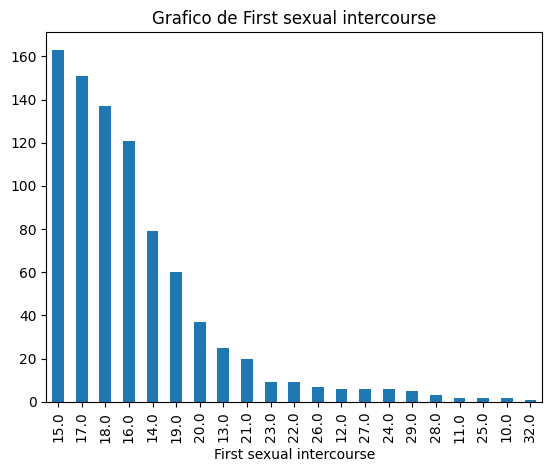

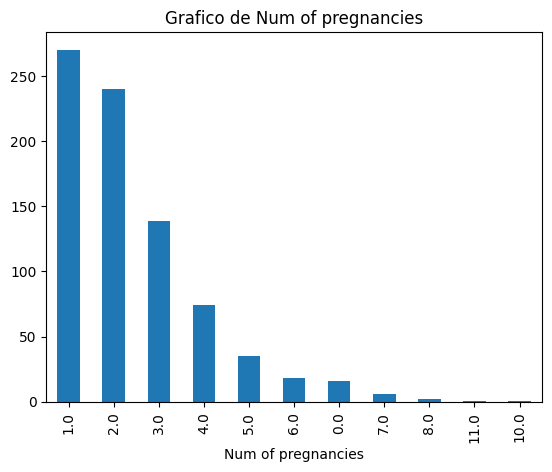

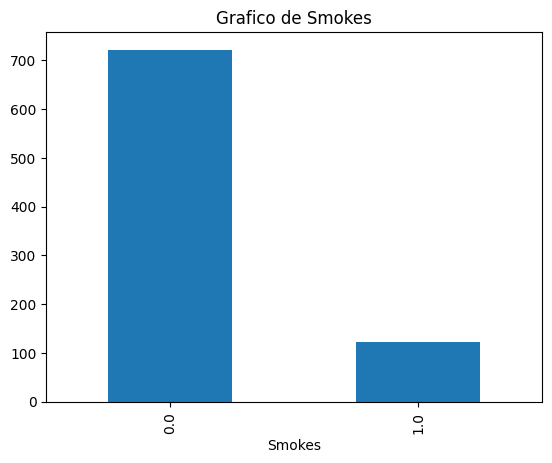

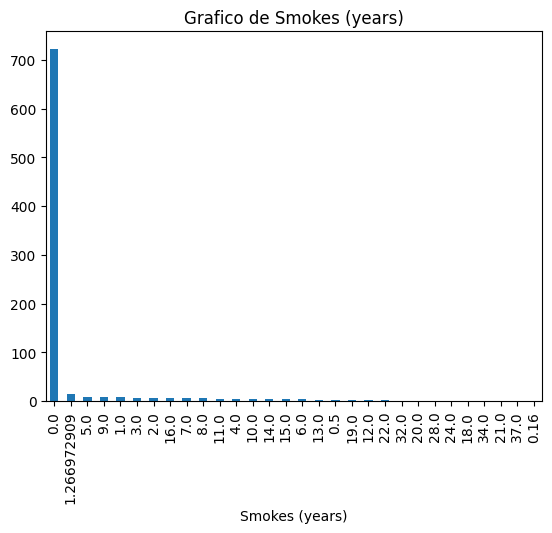

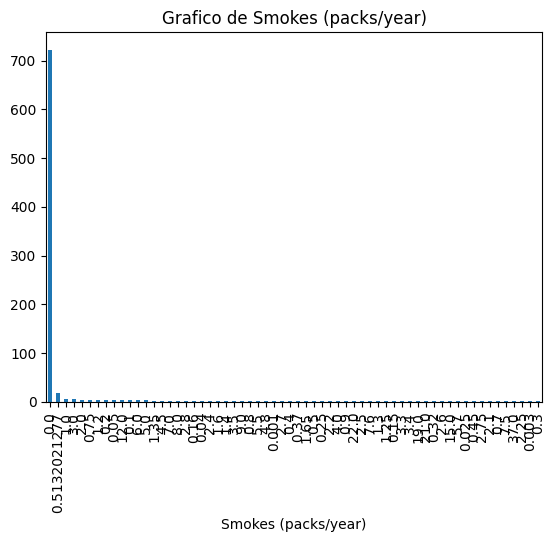

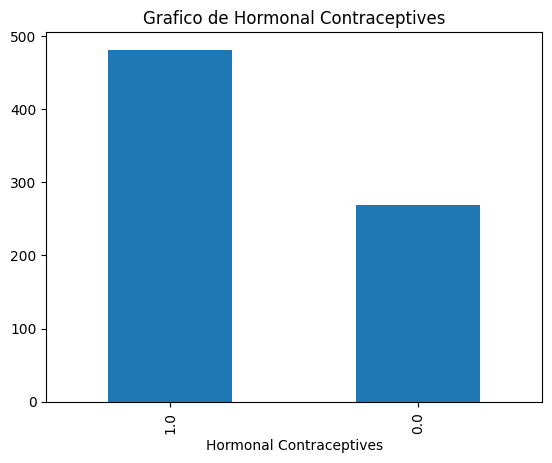

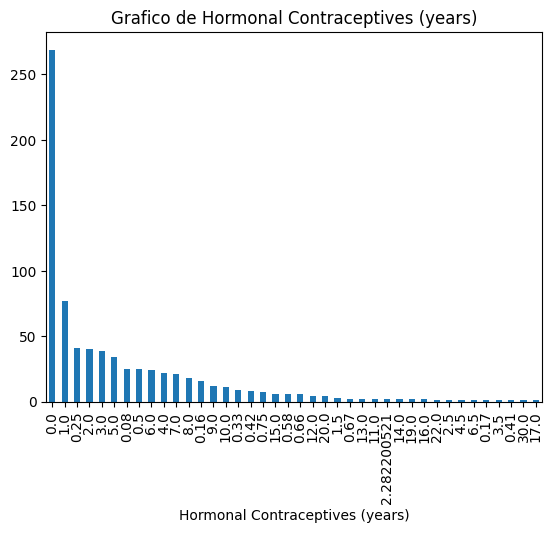

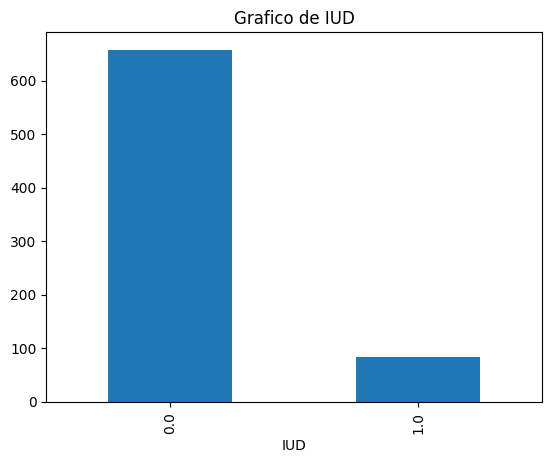

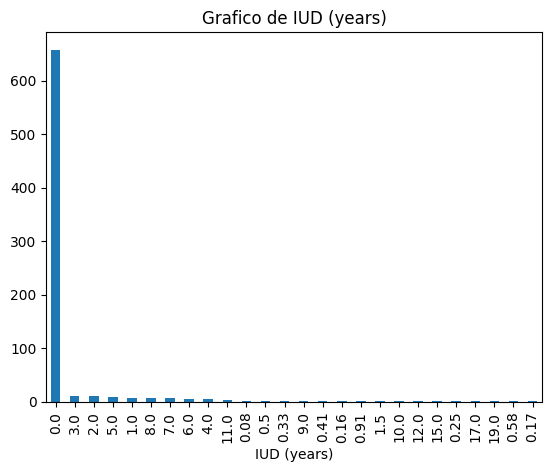

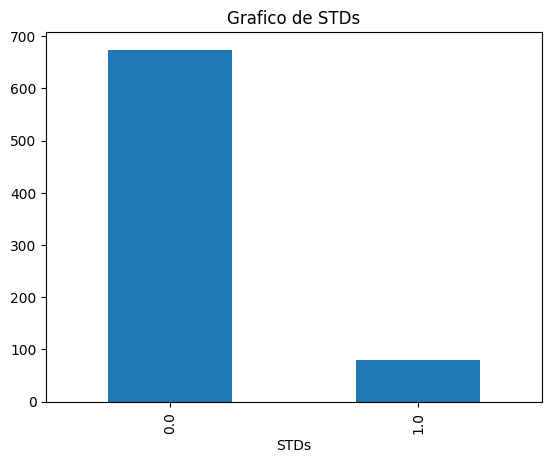

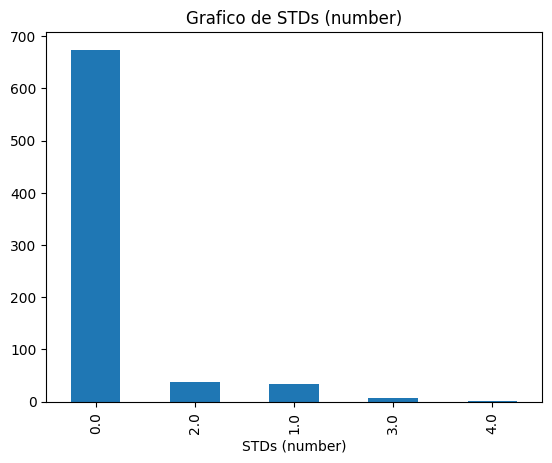

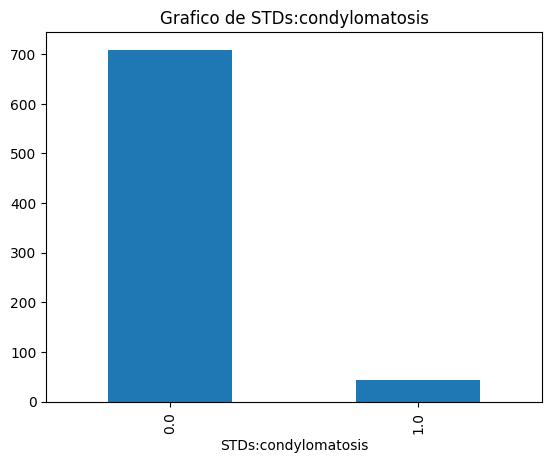

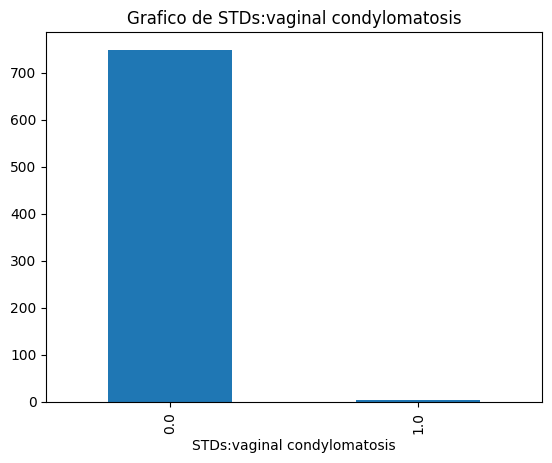

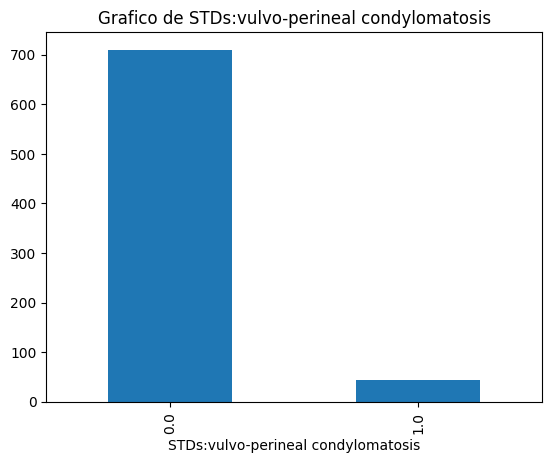

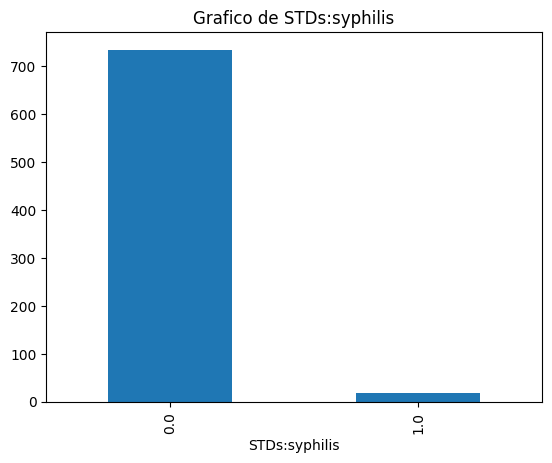

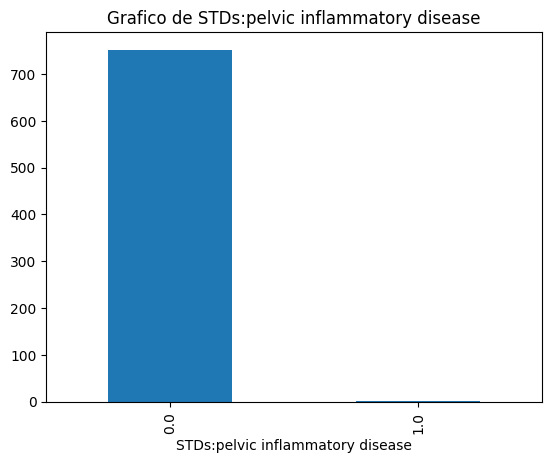

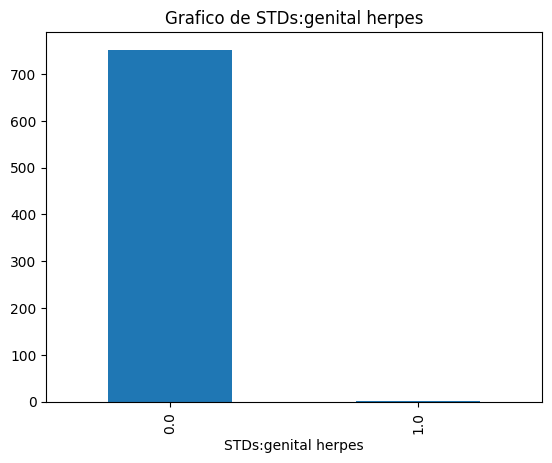

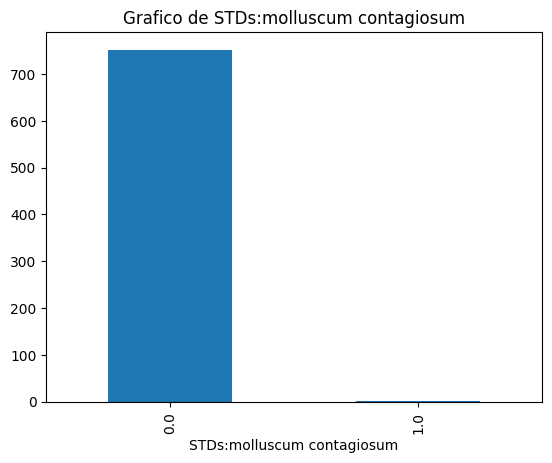

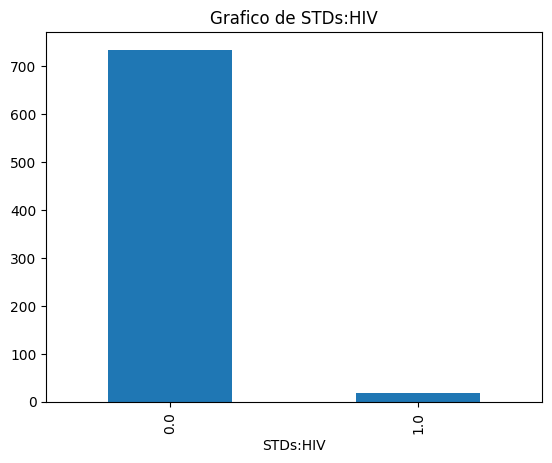

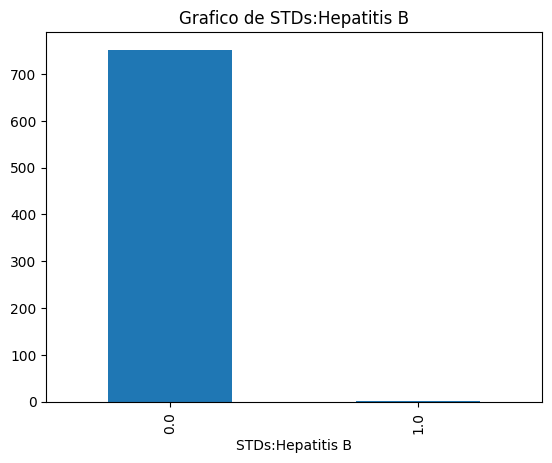

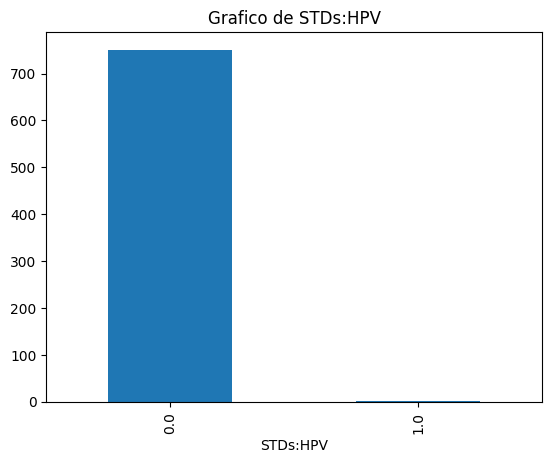

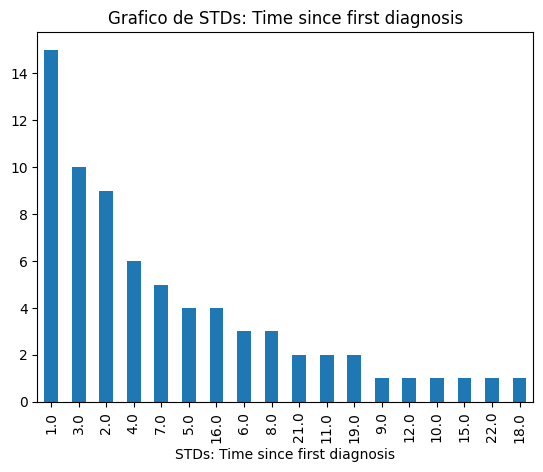

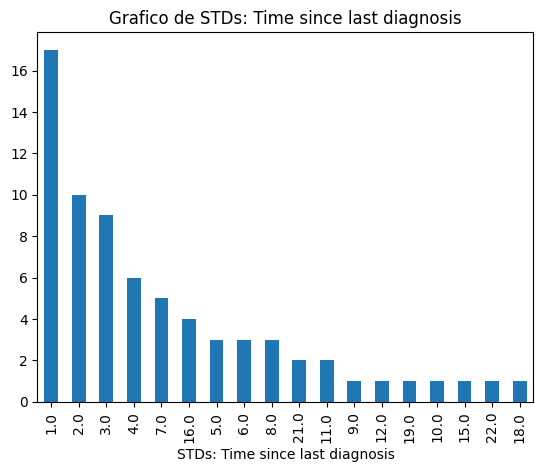

In [26]:
# Ahora graficaremos las variables de tipo Category

for i in columns:
    if columnsTypes[i] == "Category":
        data[i].value_counts().plot(kind='bar')
        plt.title(f"Grafico de {i}")
        plt.show()

### 4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

In [31]:
# obtendremos las columnas que tienen valores int o float
columnsIntFloat = data.select_dtypes(include=['int64', 'float64']).columns

# imprimeremos las columnas que tienen valores int o float
print("Columnas con valores int o float:")
for i in range(len(columnsIntFloat)):
    print(str(i) + " - " + columnsIntFloat[i])
    
    
# ahora vamos a graficar las variables de tipo Category
columnsCategory = data.select_dtypes(include=['object']).columns

# imprimeremos las columnas que tienen valores object (category)
print("Columnas con valores object: ")
for i in range(len(columnsCategory)):
    print(str(i) + " - " + columnsCategory[i])
    
    
# clean category columns
columnsCategory = columnsCategory.fillna(0)




Columnas con valores int o float:
0 - Age
1 - STDs: Number of diagnosis
2 - Dx:Cancer
3 - Dx:CIN
4 - Dx:HPV
5 - Dx
6 - Hinselmann
7 - Schiller
8 - Citology
9 - Biopsy
Columnas con valores object: 
0 - Number of sexual partners
1 - First sexual intercourse
2 - Num of pregnancies
3 - Smokes
4 - Smokes (years)
5 - Smokes (packs/year)
6 - Hormonal Contraceptives
7 - Hormonal Contraceptives (years)
8 - IUD
9 - IUD (years)
10 - STDs
11 - STDs (number)
12 - STDs:condylomatosis
13 - STDs:cervical condylomatosis
14 - STDs:vaginal condylomatosis
15 - STDs:vulvo-perineal condylomatosis
16 - STDs:syphilis
17 - STDs:pelvic inflammatory disease
18 - STDs:genital herpes
19 - STDs:molluscum contagiosum
20 - STDs:AIDS
21 - STDs:HIV
22 - STDs:Hepatitis B
23 - STDs:HPV
24 - STDs: Time since first diagnosis
25 - STDs: Time since last diagnosis


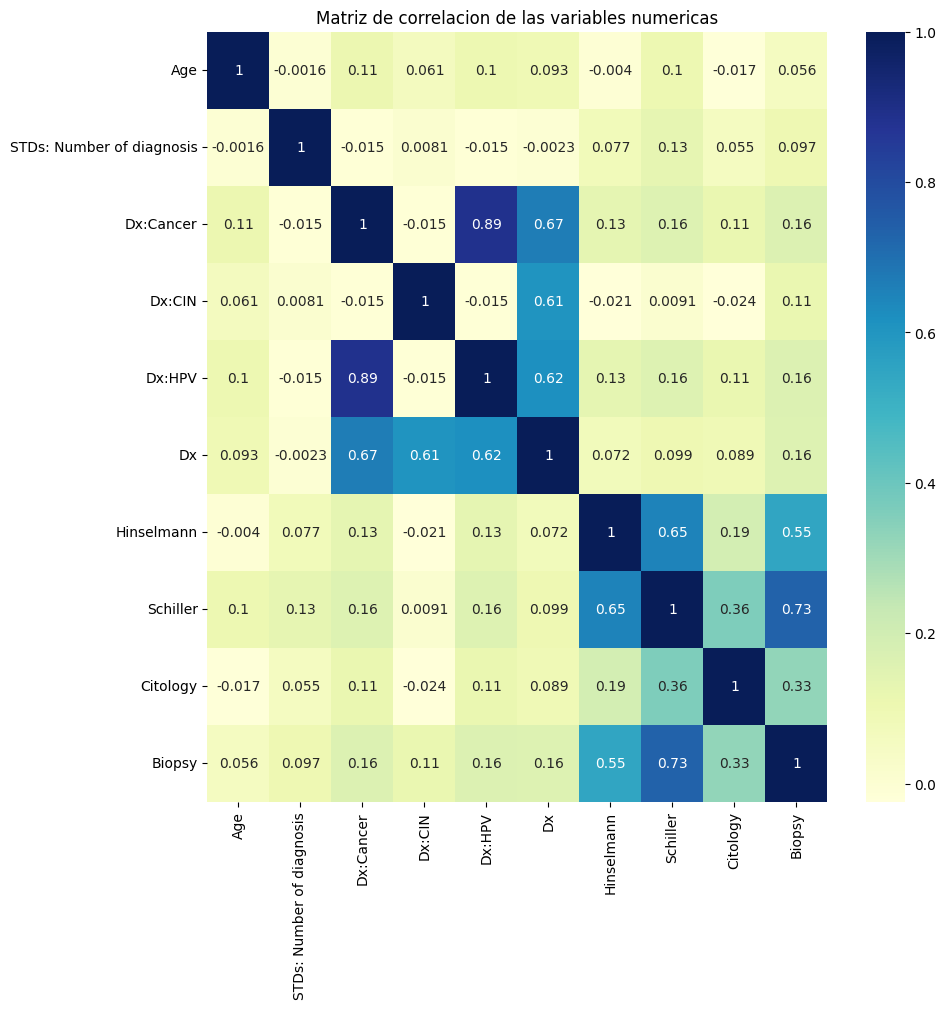

In [45]:
# graficaremos las matrices de correlacion
correlationMatrix = data[columnsIntFloat].corr()

plt.figure(figsize=(10, 10))
seaborn.heatmap(correlationMatrix, annot=True, cmap="YlGnBu")
plt.title("Matriz de correlacion de las variables numericas")
plt.show() 

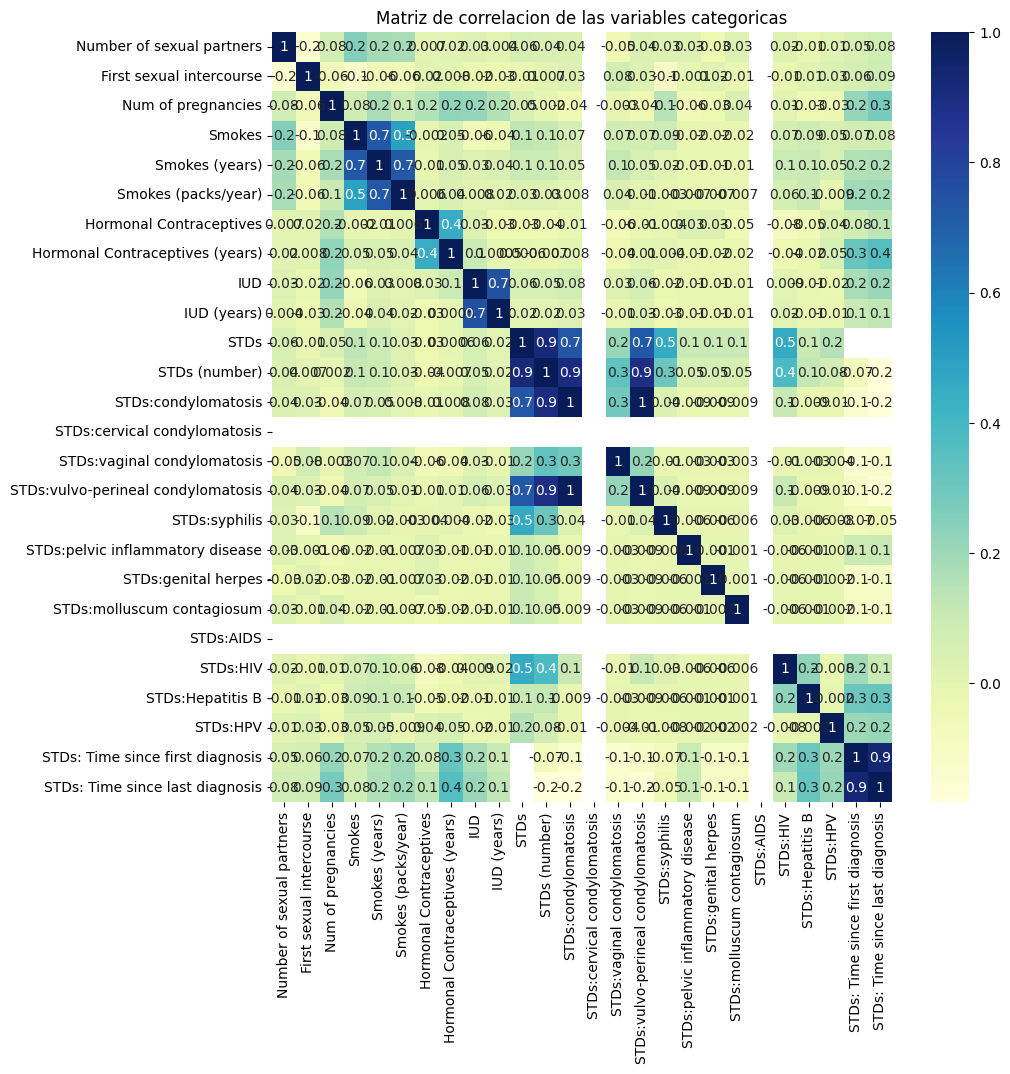

In [47]:
categoryMatrix = data[columnsCategory].corr()

plt.figure(figsize=(10, 10))
seaborn.heatmap(categoryMatrix, annot=True, cmap="YlGnBu", fmt='.1g')
plt.title("Matriz de correlacion de las variables categoricas")
plt.show()

### Al observar las matrices de correlaciones, se puede apreciar que la mayoría de los coeficientes son positivos, lo que significa que hay una relación directa entre las variables. Esto implica que cuando una variable aumenta, la otra también lo hace, y viceversa. Los cuadros con alguna sombra de azul son los que tienen mayor correlación, es decir, los que indican una mayor fuerza y dirección de la relación lineal entre las variables. Estos cuadros se pueden usar para identificar las variables más relacionadas entre sí y las que tienen más influencia en el comportamiento del dataset.

### 5. Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos.

<Figure size 1000x1000 with 0 Axes>

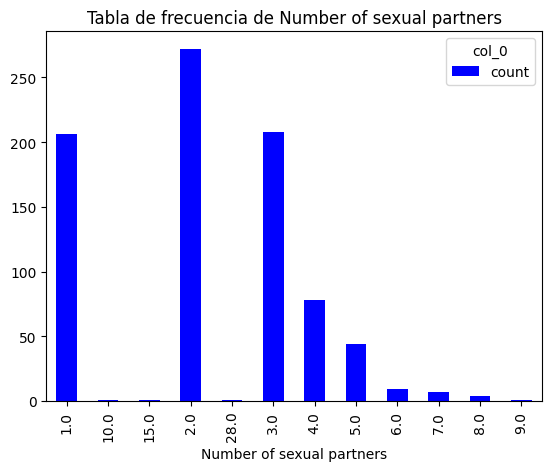

<Figure size 1000x1000 with 0 Axes>

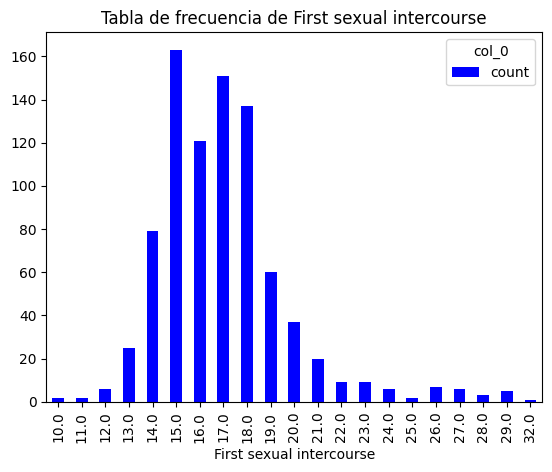

<Figure size 1000x1000 with 0 Axes>

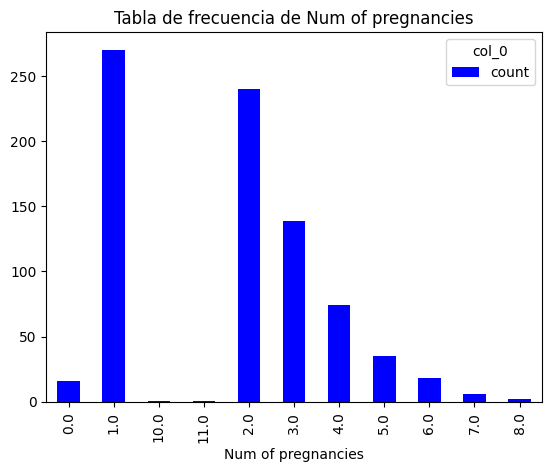

<Figure size 1000x1000 with 0 Axes>

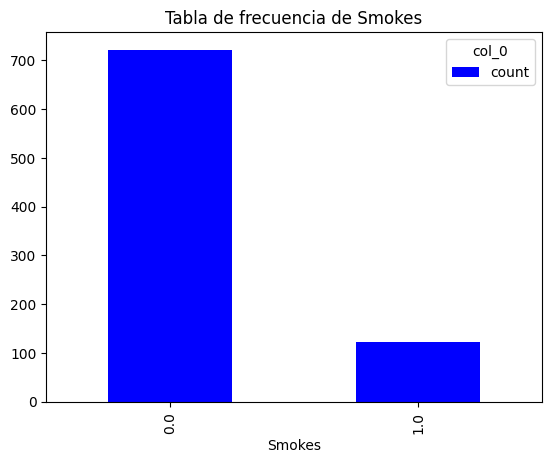

<Figure size 1000x1000 with 0 Axes>

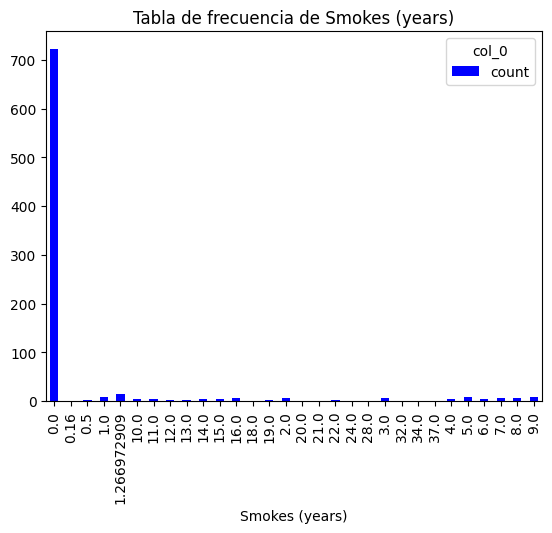

<Figure size 1000x1000 with 0 Axes>

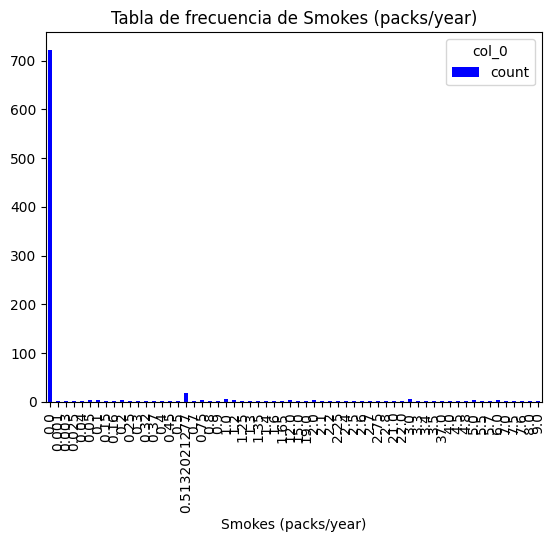

<Figure size 1000x1000 with 0 Axes>

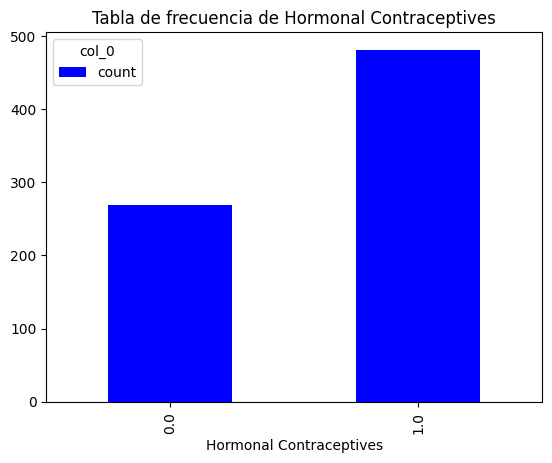

<Figure size 1000x1000 with 0 Axes>

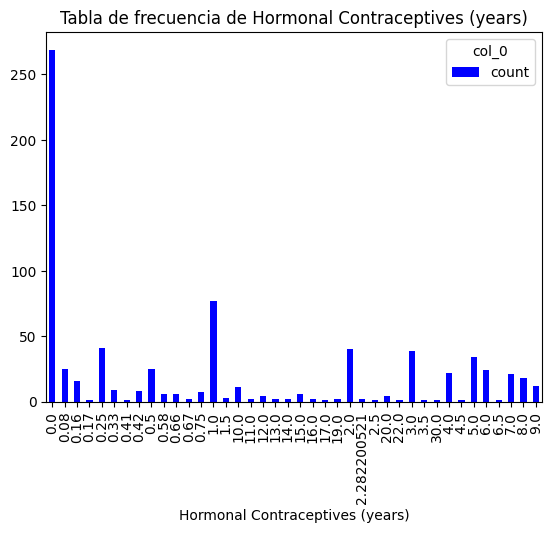

<Figure size 1000x1000 with 0 Axes>

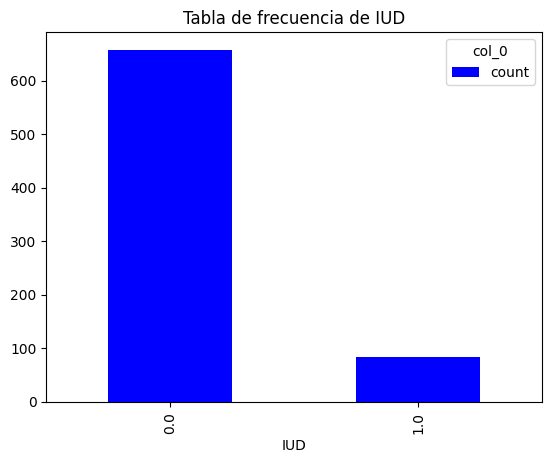

<Figure size 1000x1000 with 0 Axes>

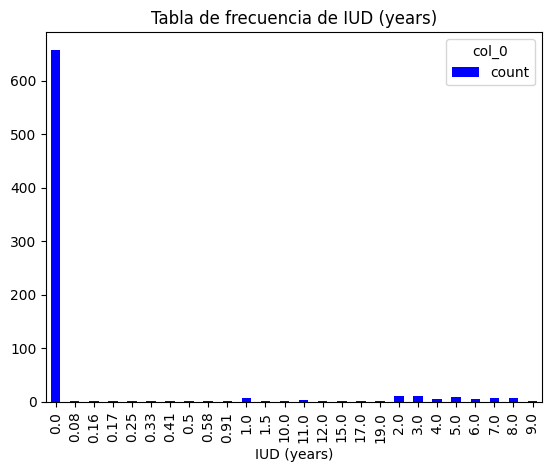

<Figure size 1000x1000 with 0 Axes>

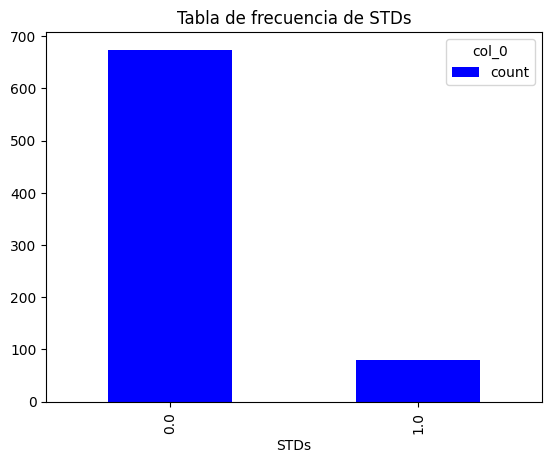

<Figure size 1000x1000 with 0 Axes>

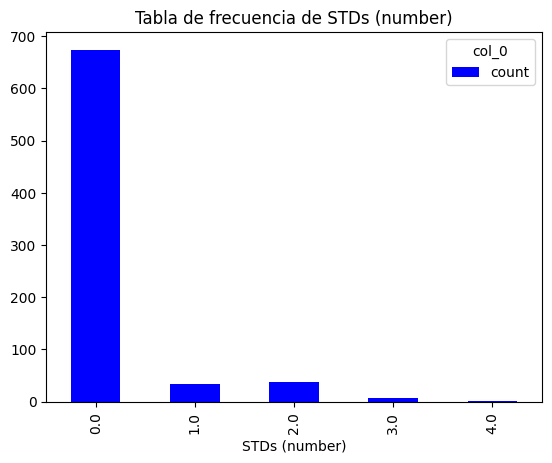

<Figure size 1000x1000 with 0 Axes>

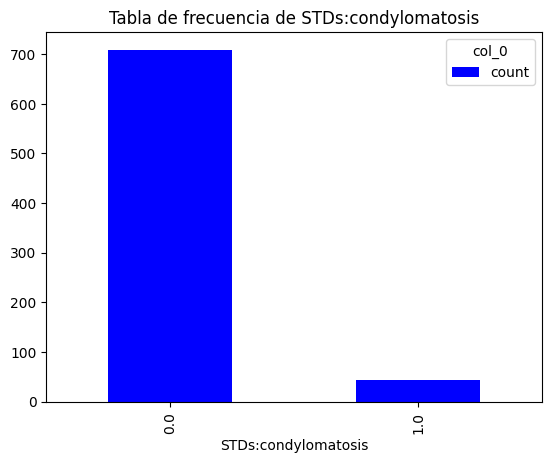

<Figure size 1000x1000 with 0 Axes>

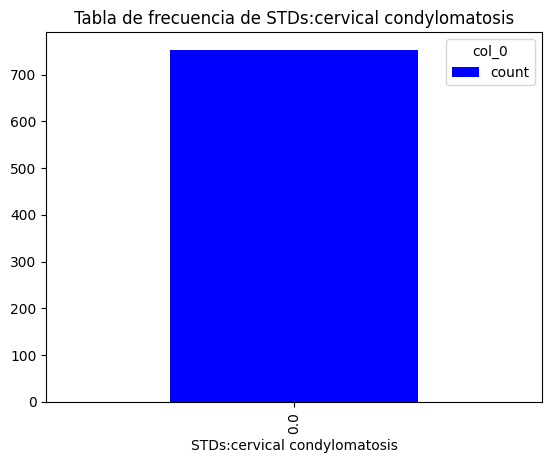

<Figure size 1000x1000 with 0 Axes>

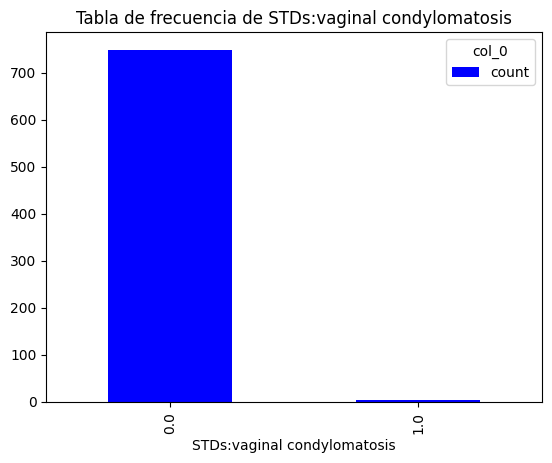

<Figure size 1000x1000 with 0 Axes>

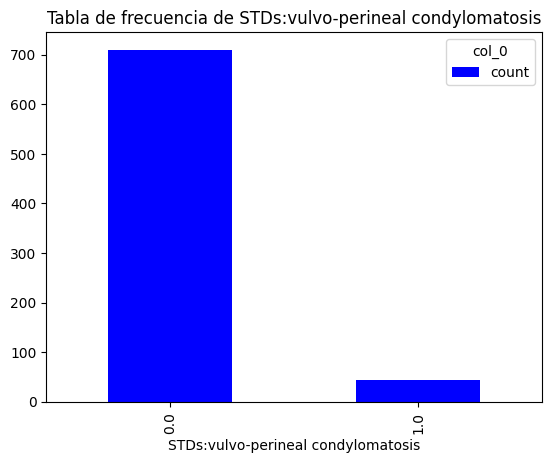

<Figure size 1000x1000 with 0 Axes>

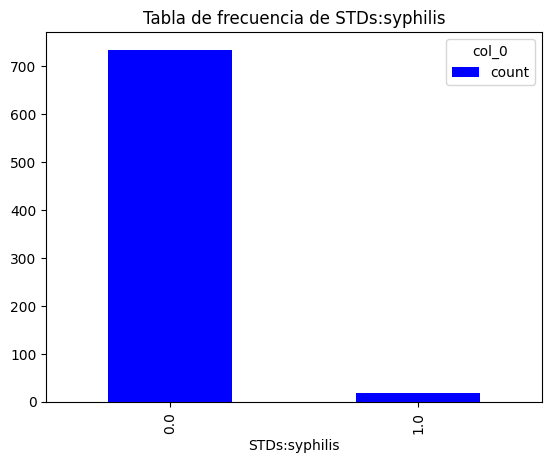

<Figure size 1000x1000 with 0 Axes>

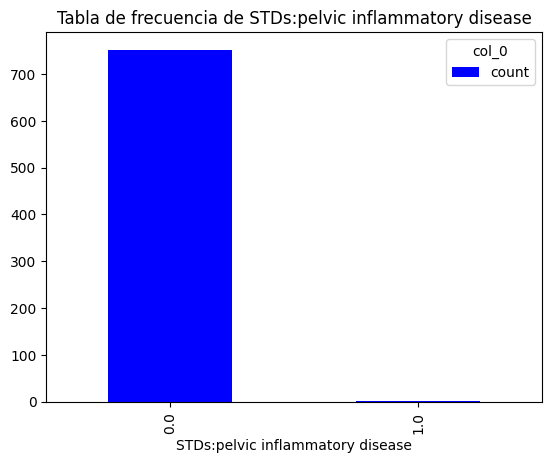

<Figure size 1000x1000 with 0 Axes>

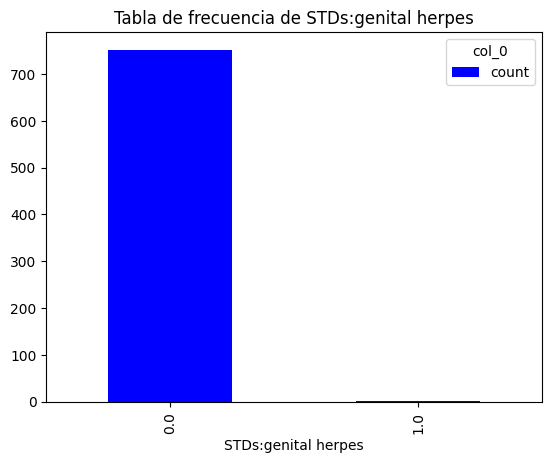

<Figure size 1000x1000 with 0 Axes>

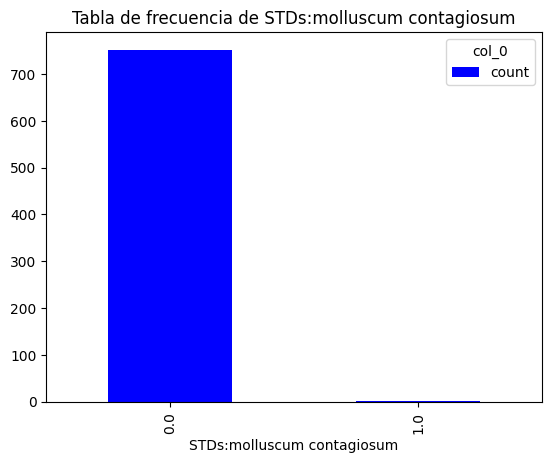

<Figure size 1000x1000 with 0 Axes>

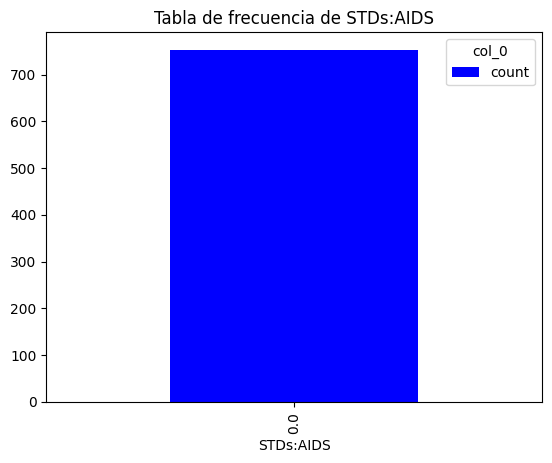

<Figure size 1000x1000 with 0 Axes>

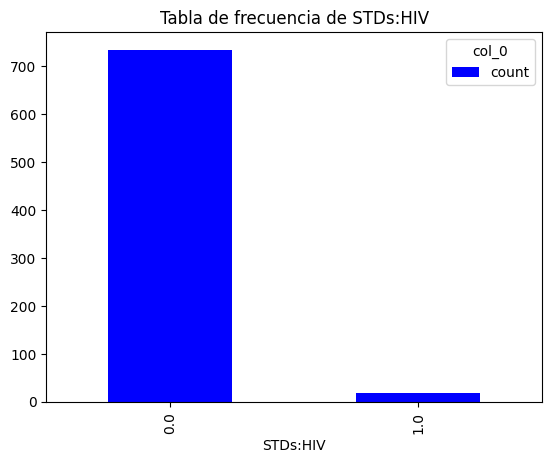

<Figure size 1000x1000 with 0 Axes>

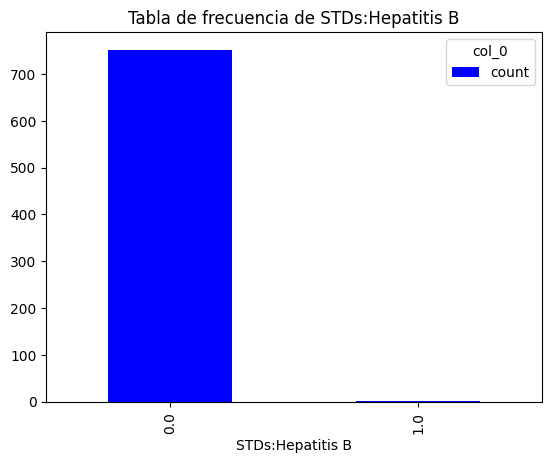

<Figure size 1000x1000 with 0 Axes>

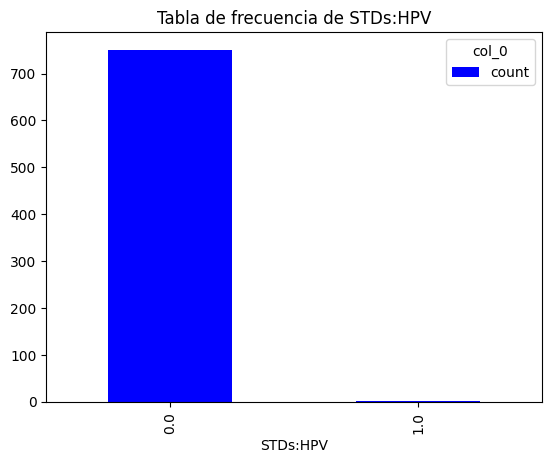

<Figure size 1000x1000 with 0 Axes>

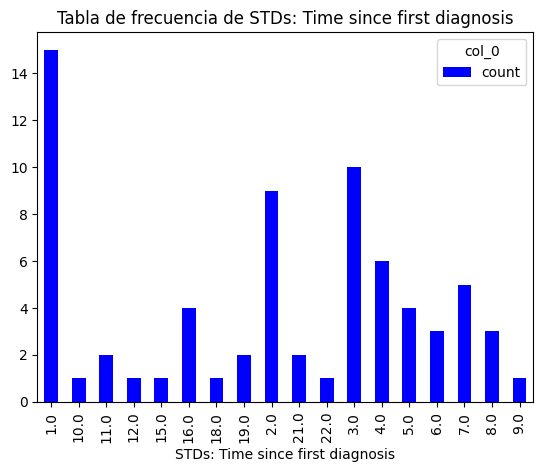

<Figure size 1000x1000 with 0 Axes>

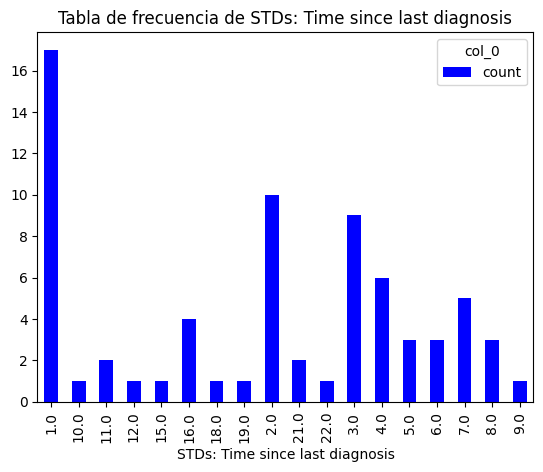

In [48]:
# generaremos tablas de frecuencia para las variables categoricas

for i in columnsCategory:
    
    # graficaremos las tablas de frecuencia
    plt.figure(figsize=(10, 10))
    frequenctTable = pd.crosstab(index=data[i], columns="count")
    frequenctTable.plot(kind='bar', color='blue')
    plt.title(f"Tabla de frecuencia de {i}")
    plt.show()

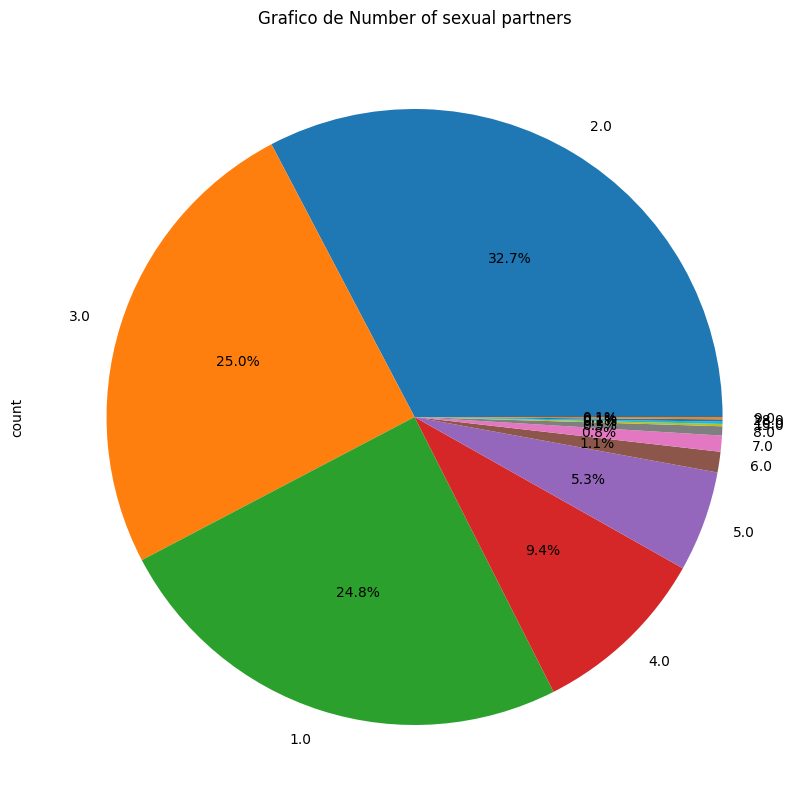

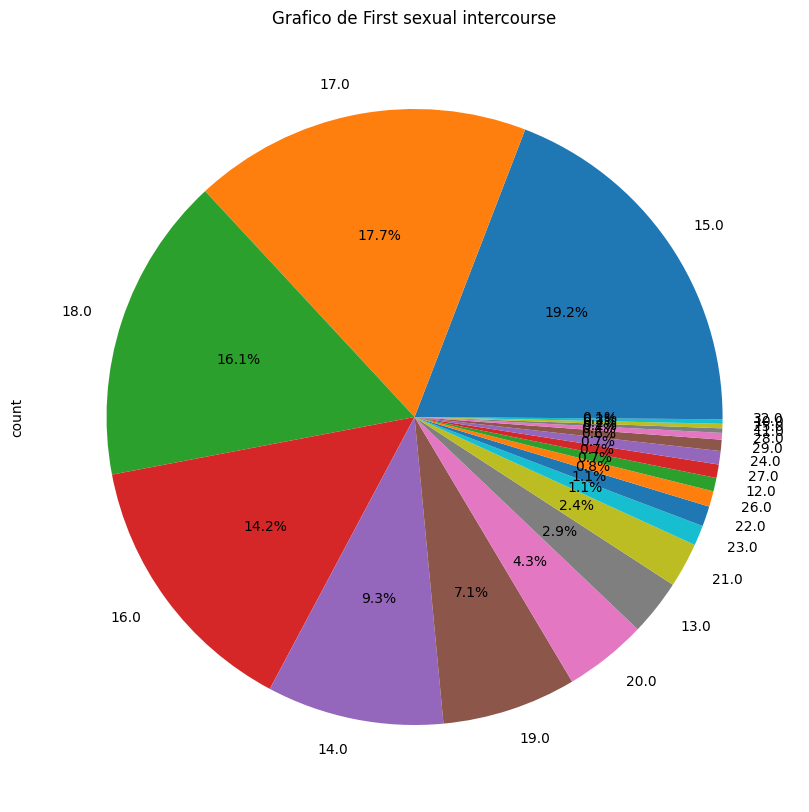

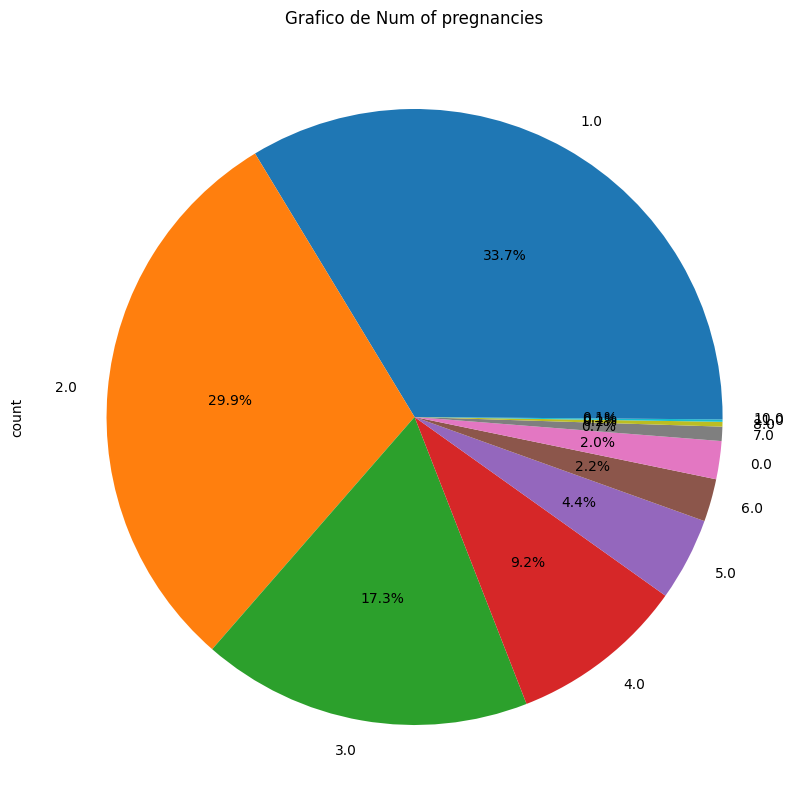

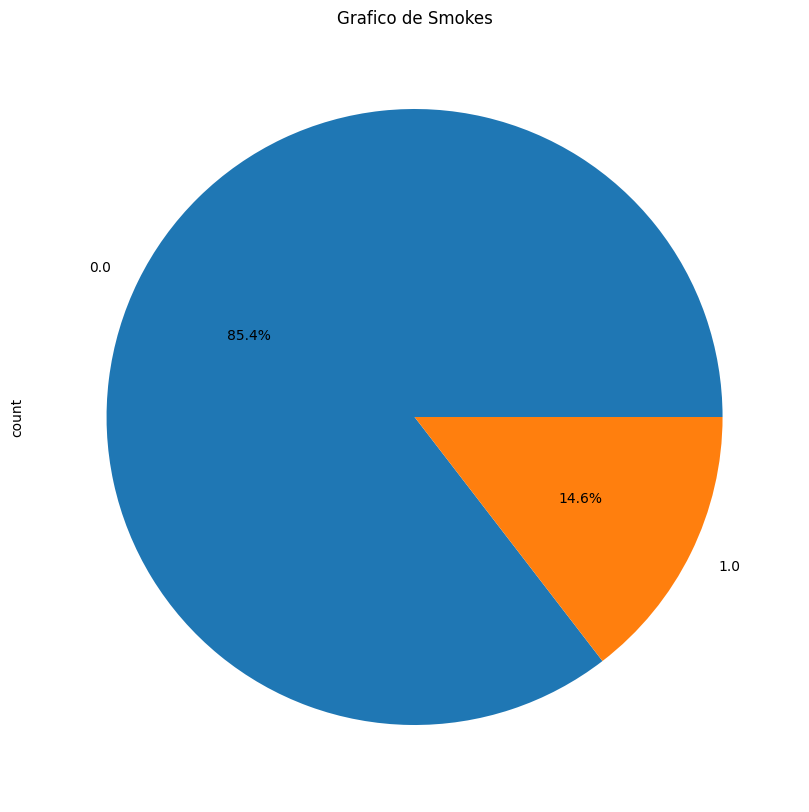

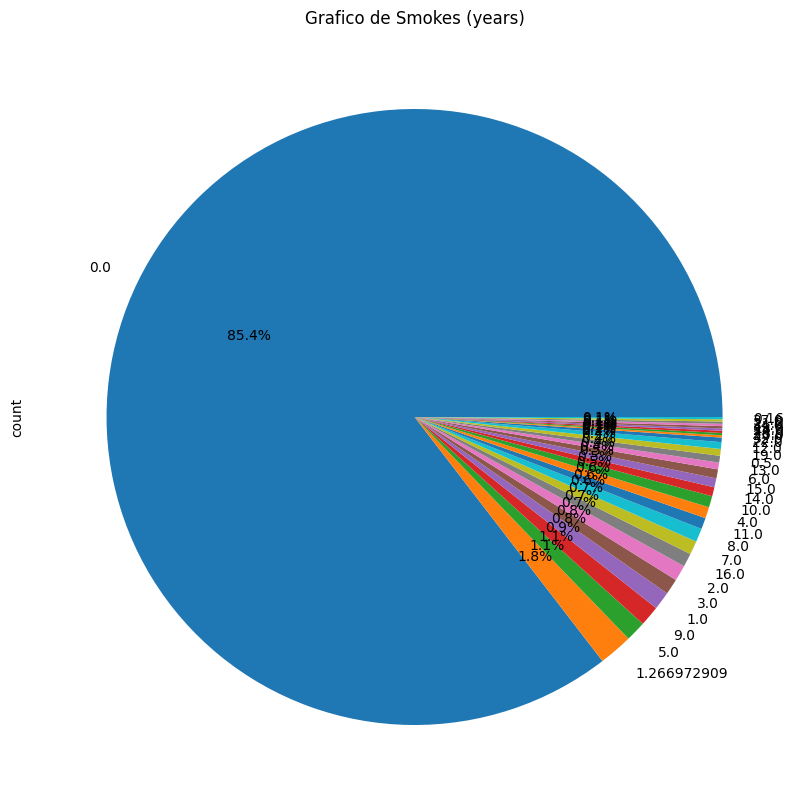

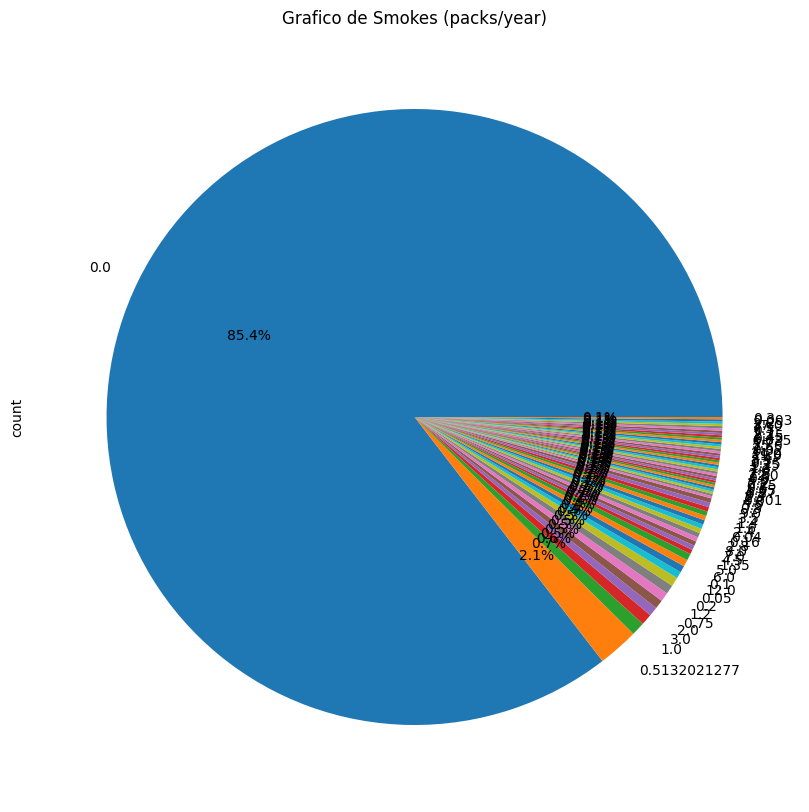

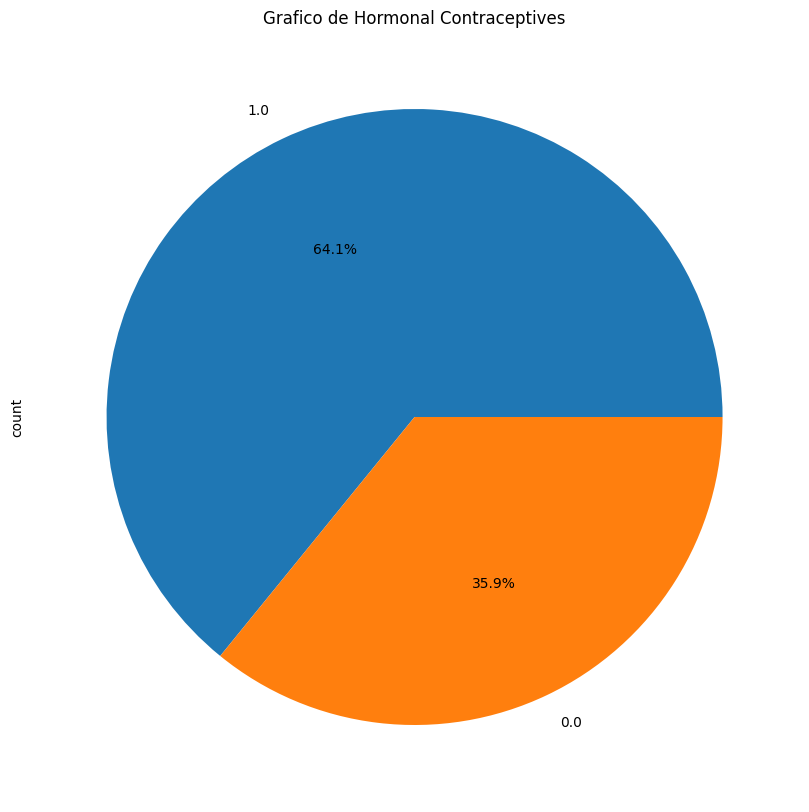

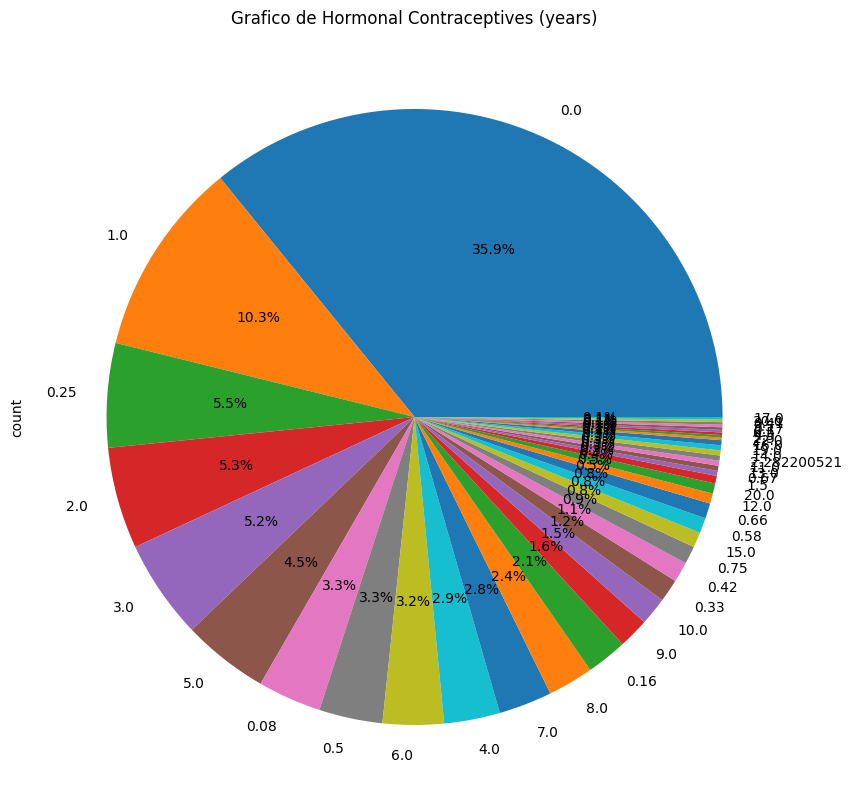

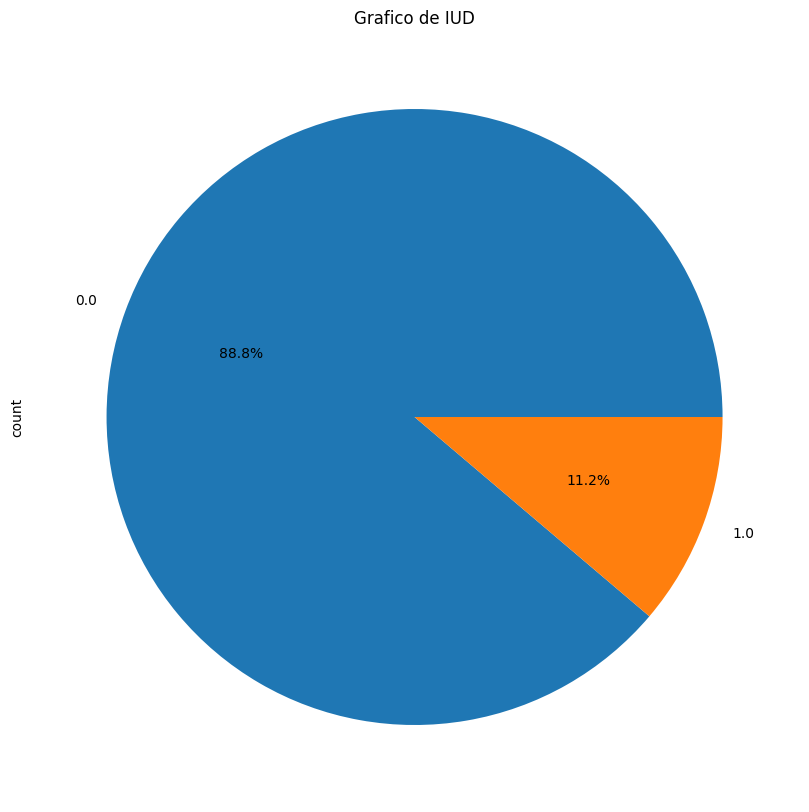

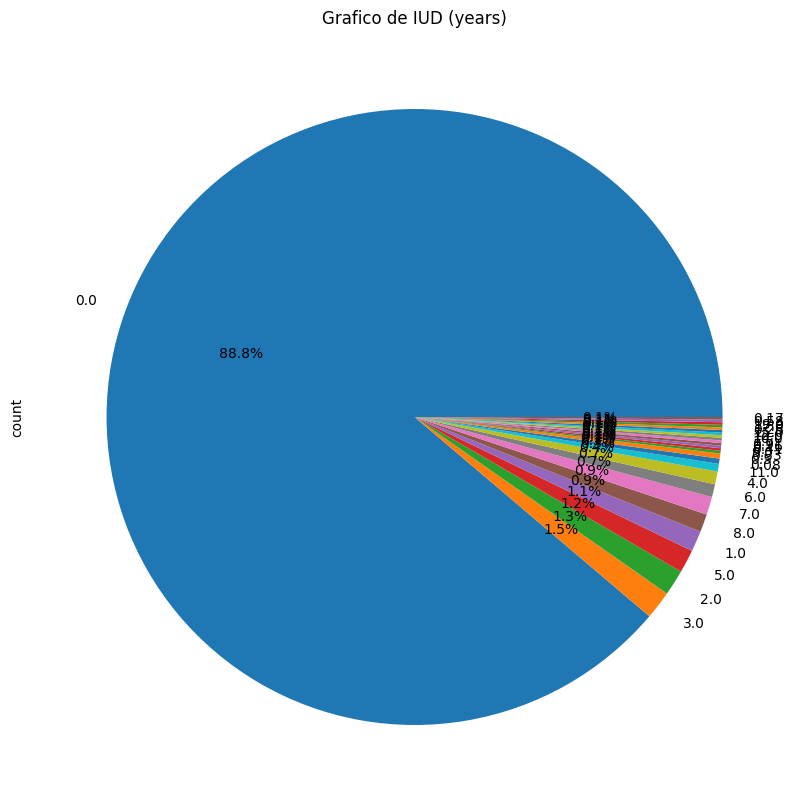

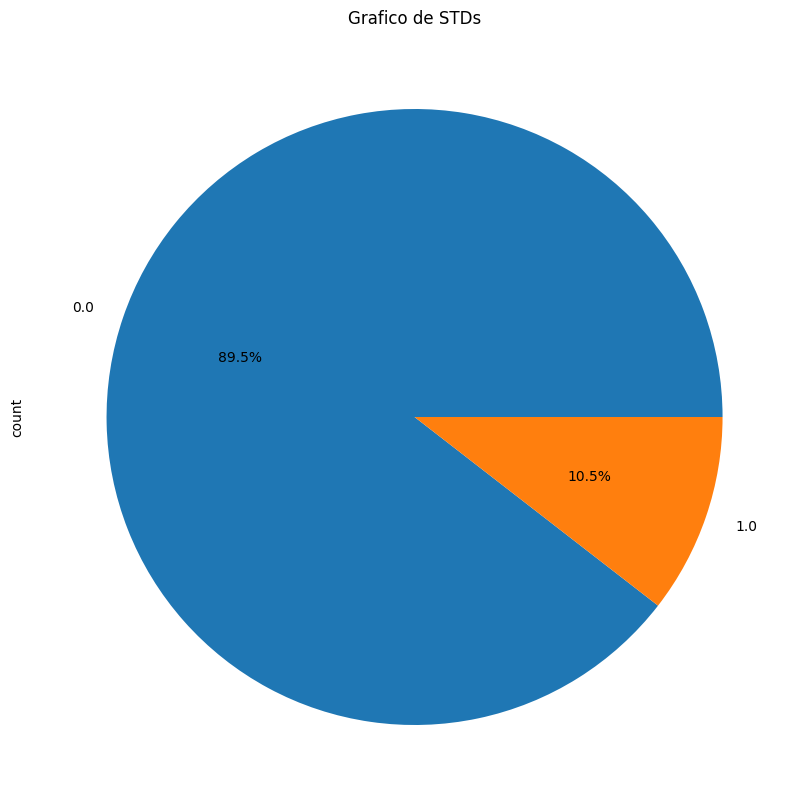

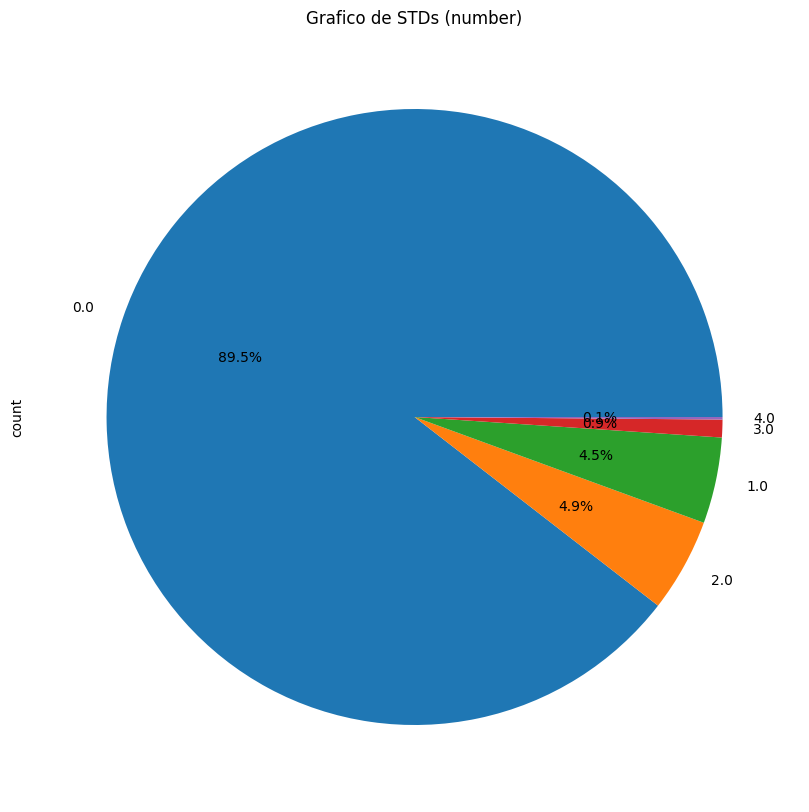

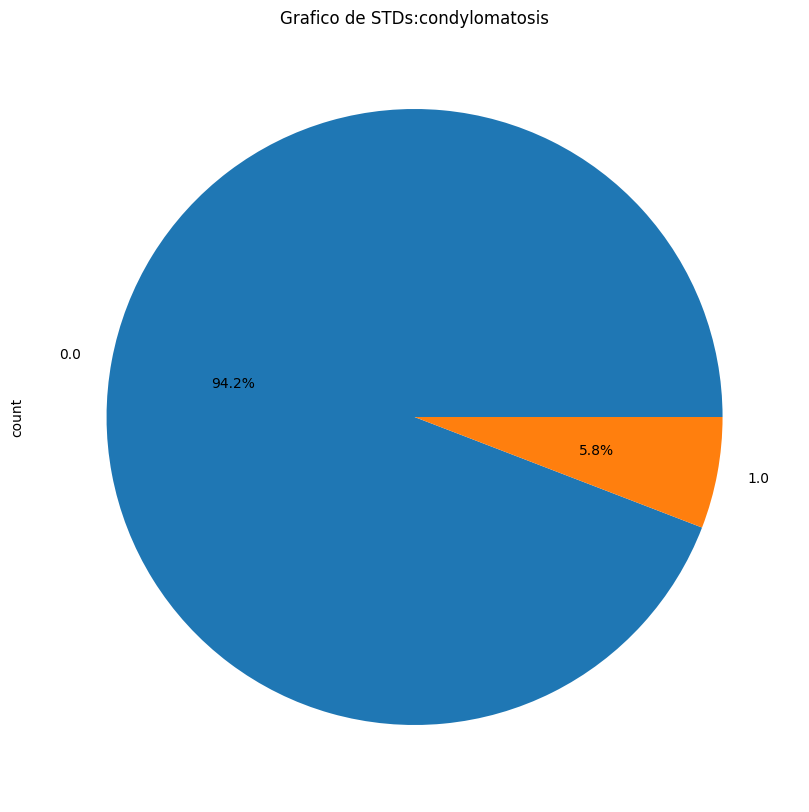

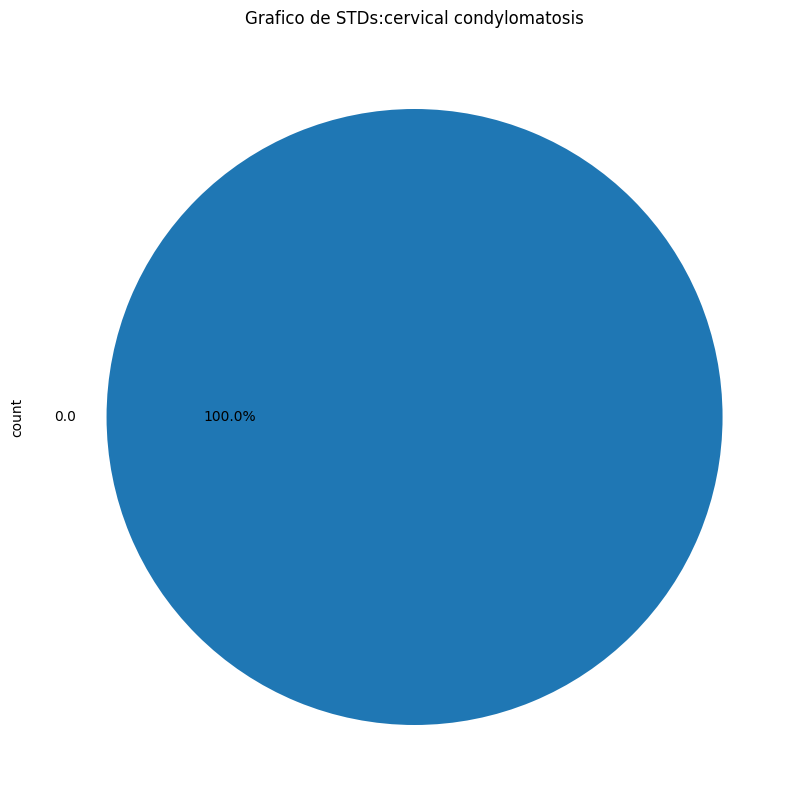

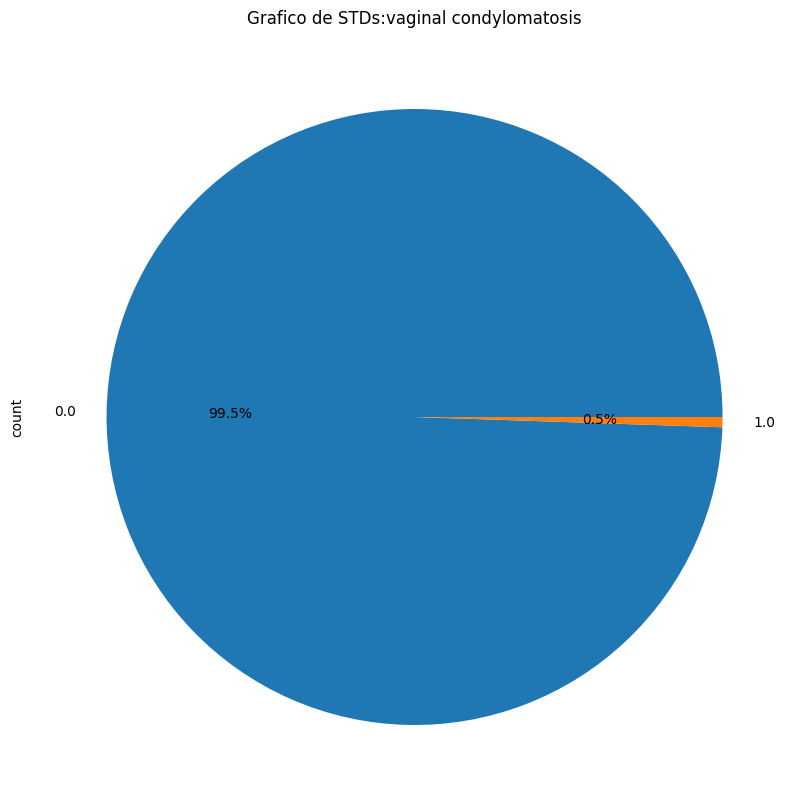

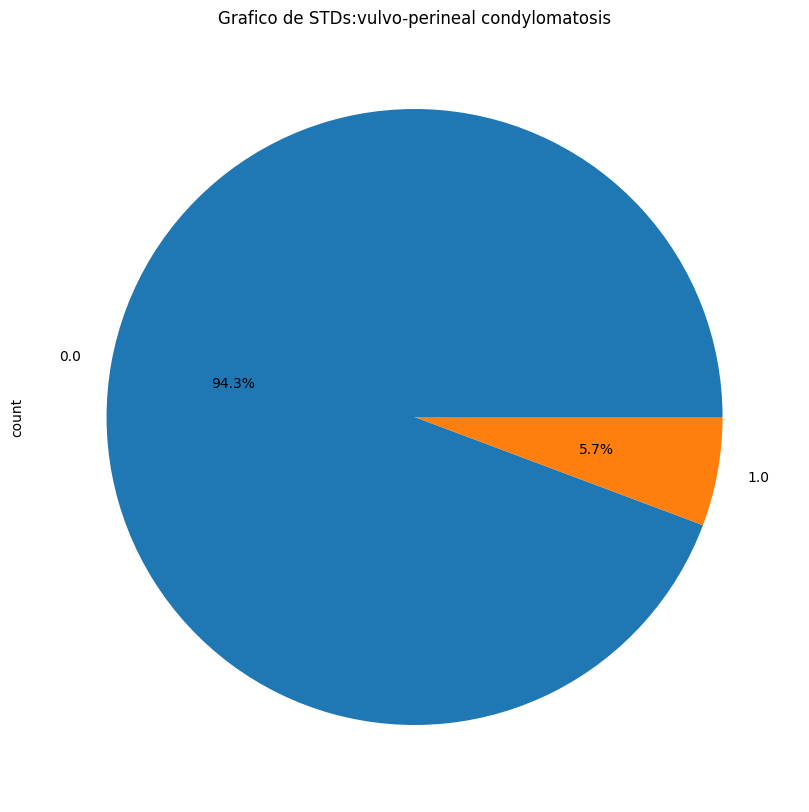

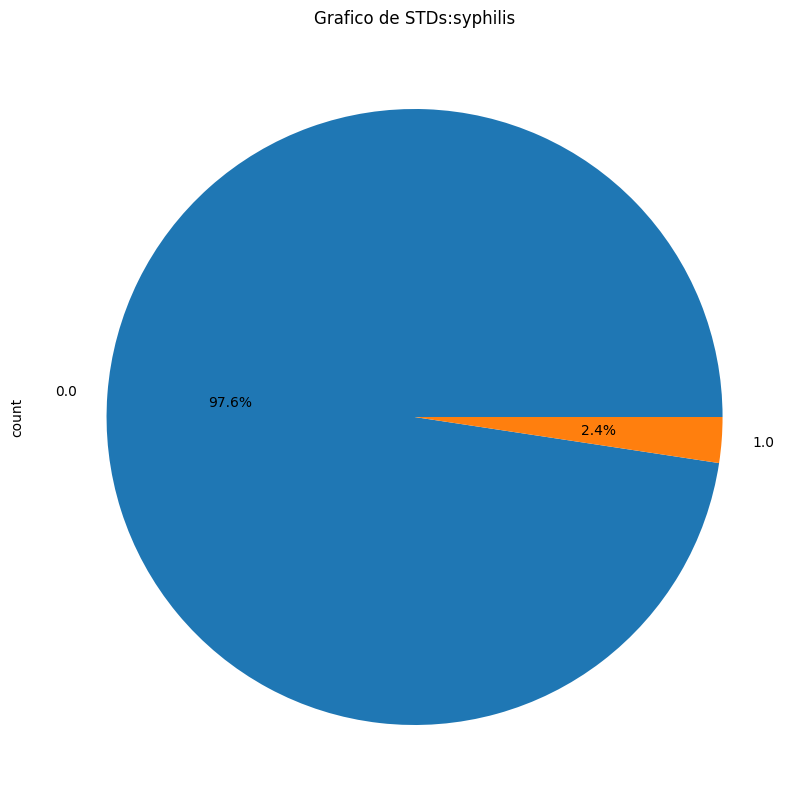

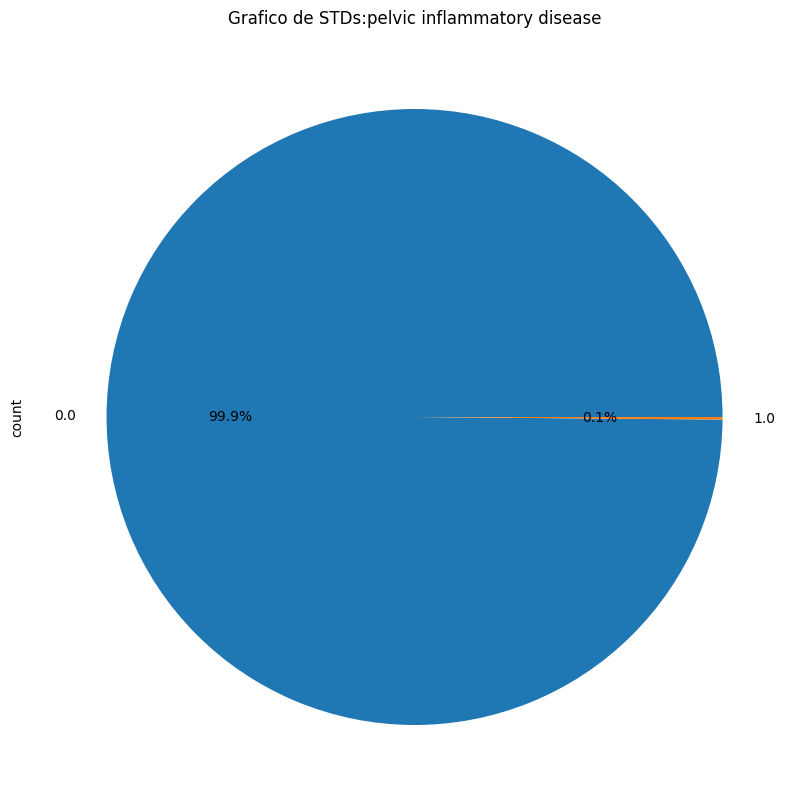

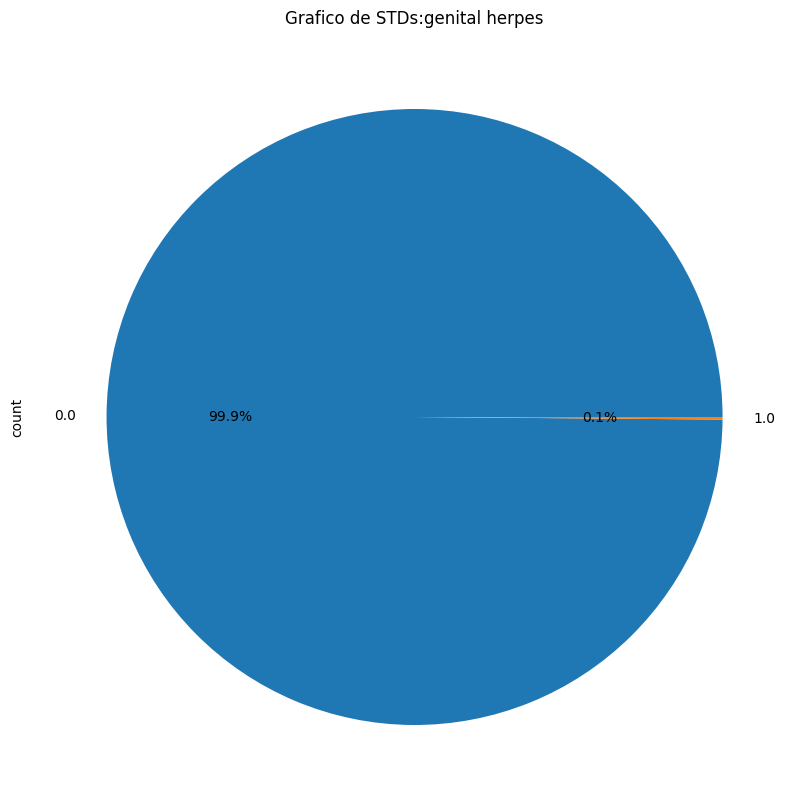

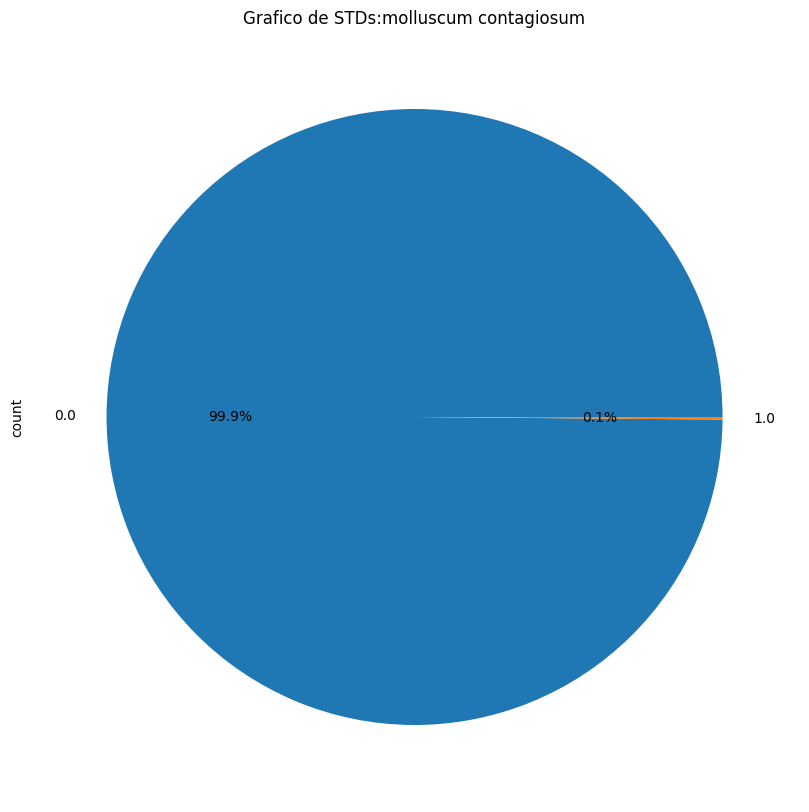

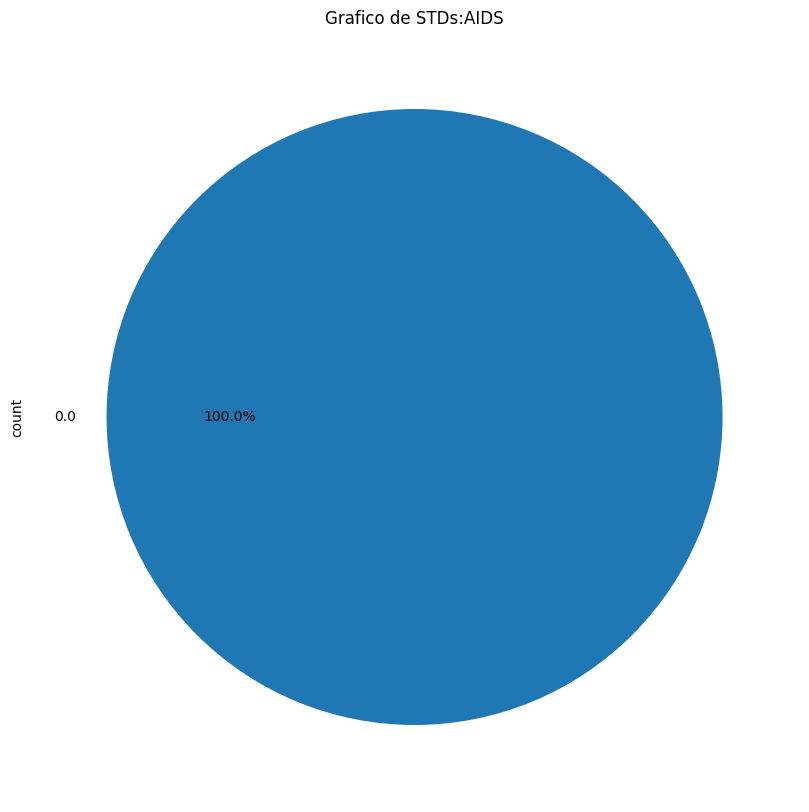

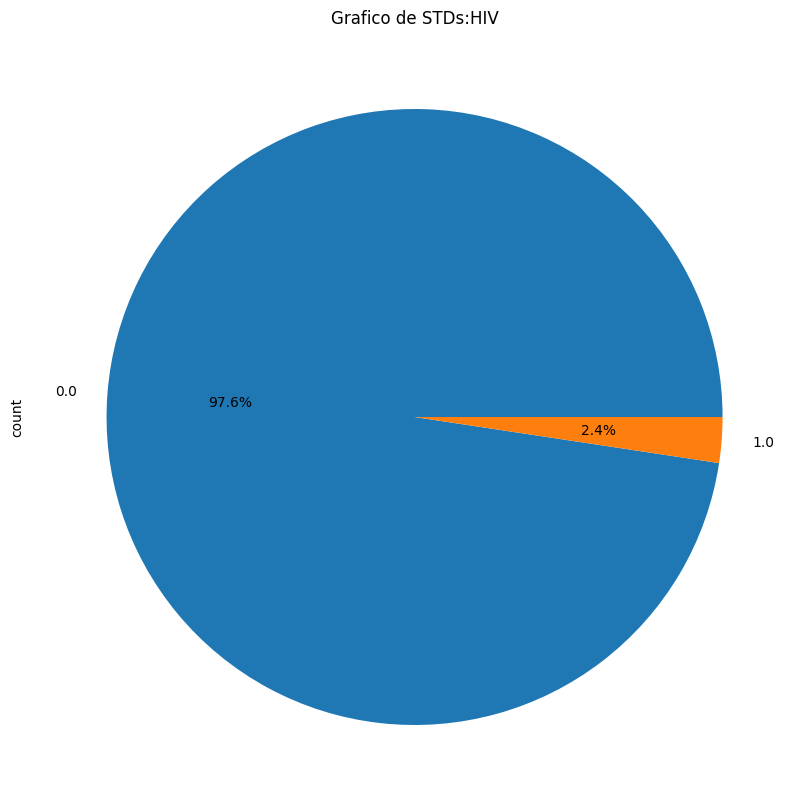

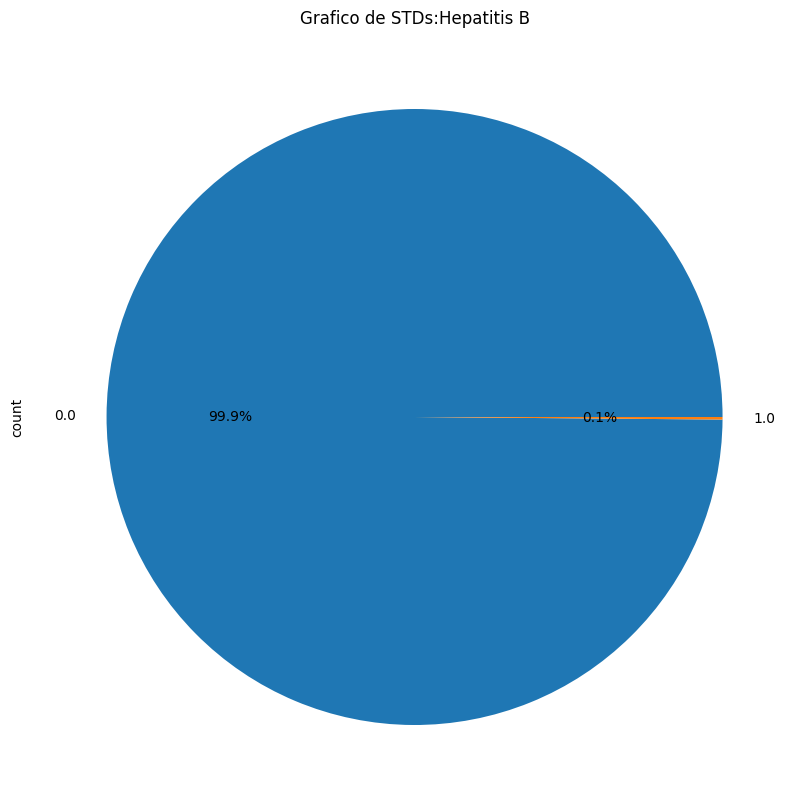

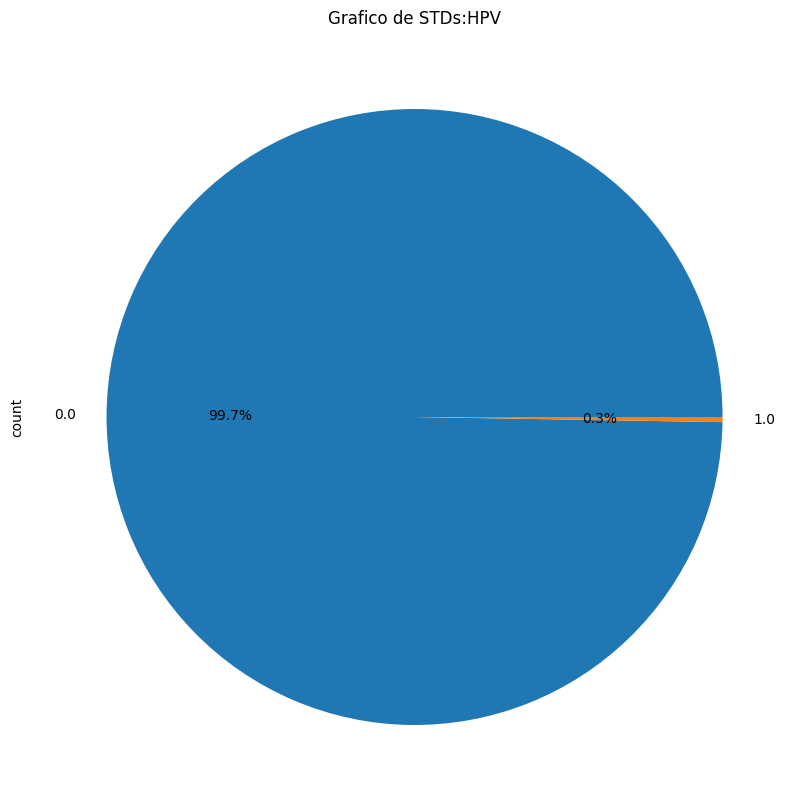

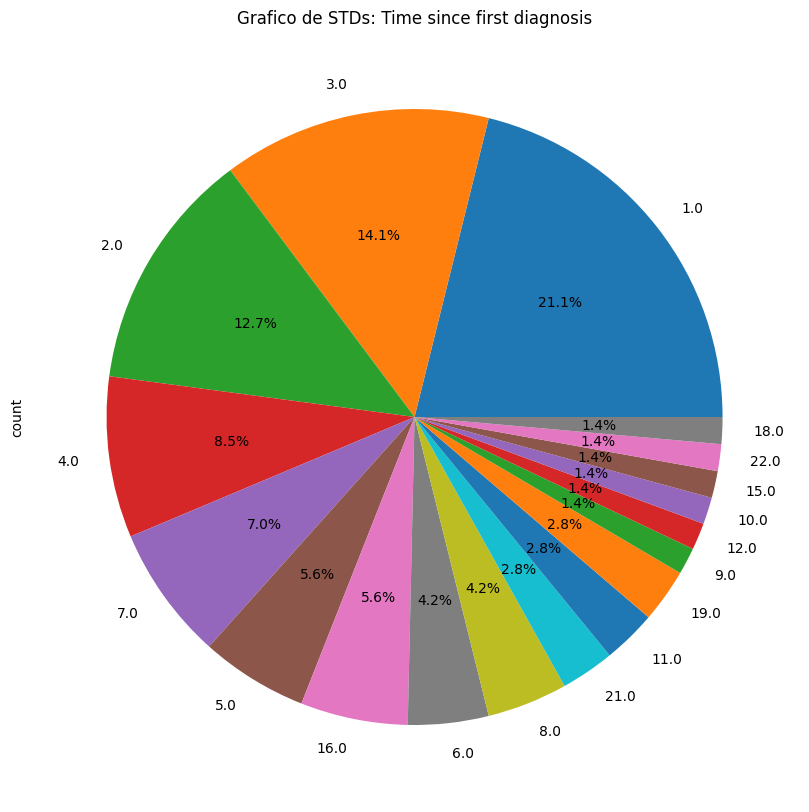

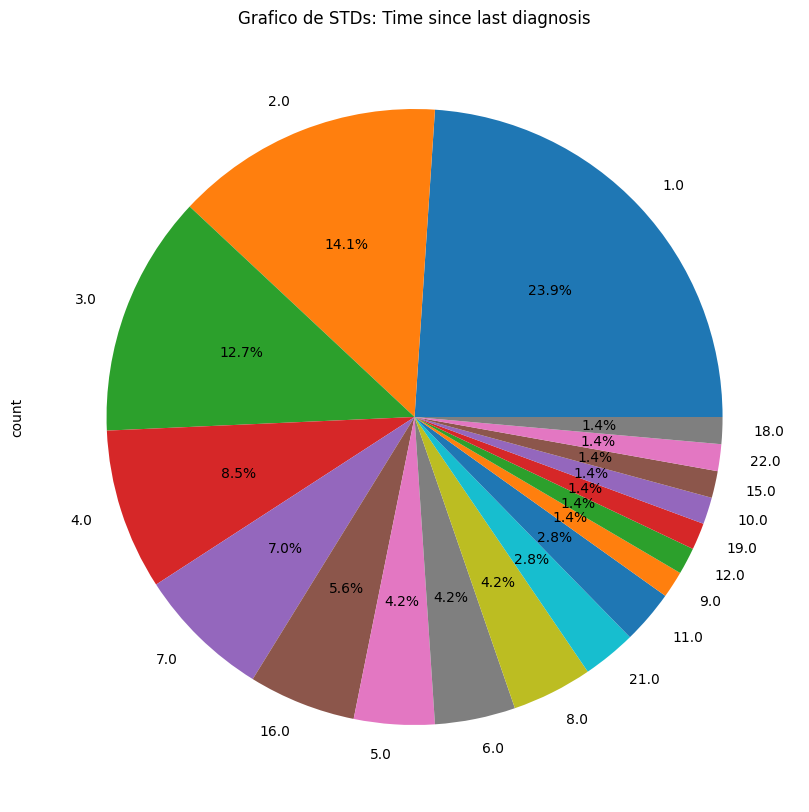

In [49]:
# ahora haremos las graficas de pie para las variables categoricas

for i in columnsCategory:
    
    # pie chart
    plt.figure(figsize=(10, 10))
    data[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"Grafico de {i}")
    plt.show()
    